### 导入数据

In [21]:
import pandas as pd
from matplotlib import pyplot as plt
from matminer.featurizers.conversions import StrToComposition
from matminer.featurizers.composition import ElementProperty

In [2]:
# 
total_data_df = pd.read_csv('data/total_data.csv')

In [3]:
total_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7277 entries, 0 to 7276
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   material_id                7277 non-null   object 
 1   formula_pretty             7277 non-null   object 
 2   crystal_system             7277 non-null   object 
 3   space_group                7277 non-null   int64  
 4   band_gap                   7277 non-null   float64
 5   density                    7277 non-null   float64
 6   density_atomic             7277 non-null   float64
 7   formation_energy_per_atom  7277 non-null   float64
 8   e_total                    7277 non-null   float64
 9   e_ionic                    7277 non-null   float64
 10  e_electronic               7277 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 625.5+ KB


- 由上述可见数据中不存在NaN

In [4]:
total_data_df.describe()

,space_group,band_gap,density,density_atomic,formation_energy_per_atom,e_total,e_ionic,e_electronic
count,7277.000000,7277.000000,7277.000000,7277.000000,7277.000000,7277.000000,7277.000000,7277.000000
mean,97.351931,2.328964,4.402645,18.866027,-1.702746,50.967904,32.435320,18.532584
std,76.170554,1.691062,1.858210,8.591112,0.982772,1656.585187,1489.248036,626.217070
min,1.000000,0.000000,0.023670,5.643294,-4.509148,1.155248,0.000000,-64.837332
25%,19.000000,1.003500,3.085919,12.585297,-2.481756,7.930701,4.000432,2.941051
50%,82.000000,1.974600,4.136236,15.917620,-1.648019,11.655871,6.467976,4.263057
75%,164.000000,3.409200,5.348088,23.646638,-0.883874,18.958478,11.352121,6.548818
max,230.000000,9.335400,17.732855,132.548261,4.688205,126575.316823,126567.273642,46857.910510


- 由上述可见数据大概不存在异常数据

In [19]:
# 查看介电常数随每一个特征的大致关系
def df_scatter_plot():
    xs = total_data_df.columns[2:8]
    ys = total_data_df.columns[8:11]
    # 分开画
    for i, y in enumerate(ys):
        for j, x in enumerate(xs):
            fig, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=300)
            ax.scatter(total_data_df[x], total_data_df[y])
            ax.set_xlabel(x)
            ax.set_ylabel(y)
            ax.set_yscale('log')
    plt.show()

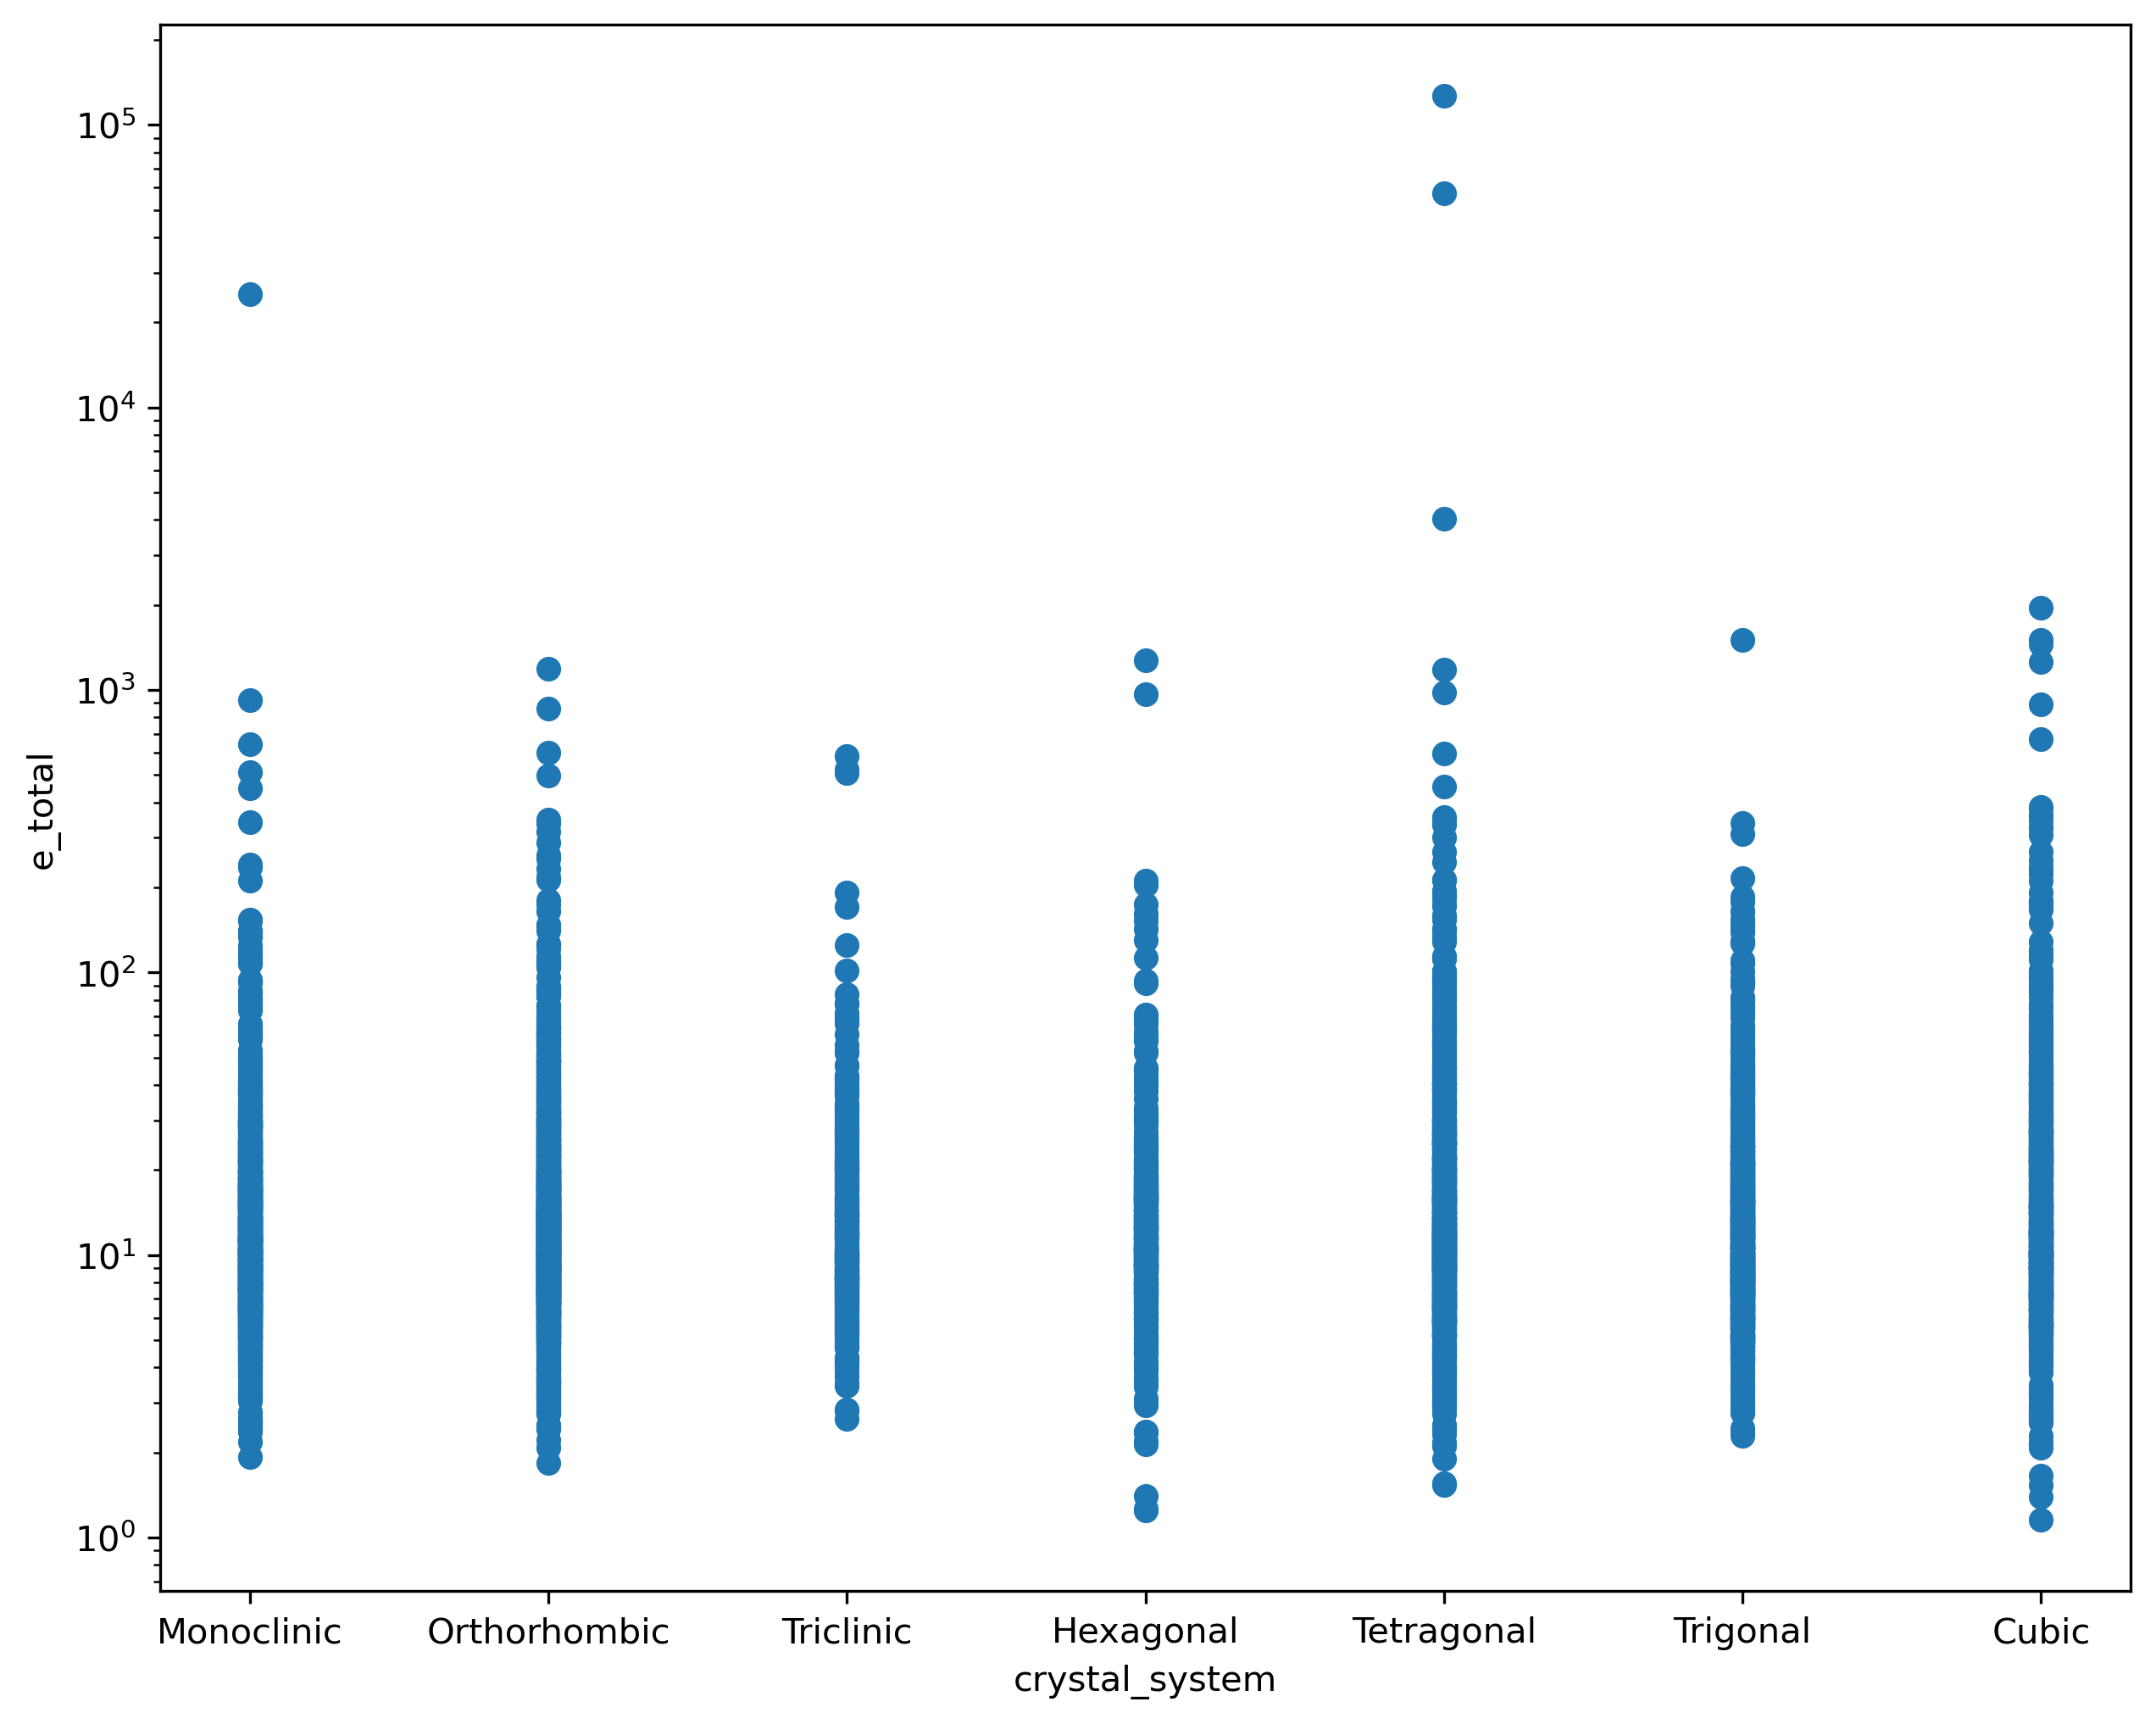

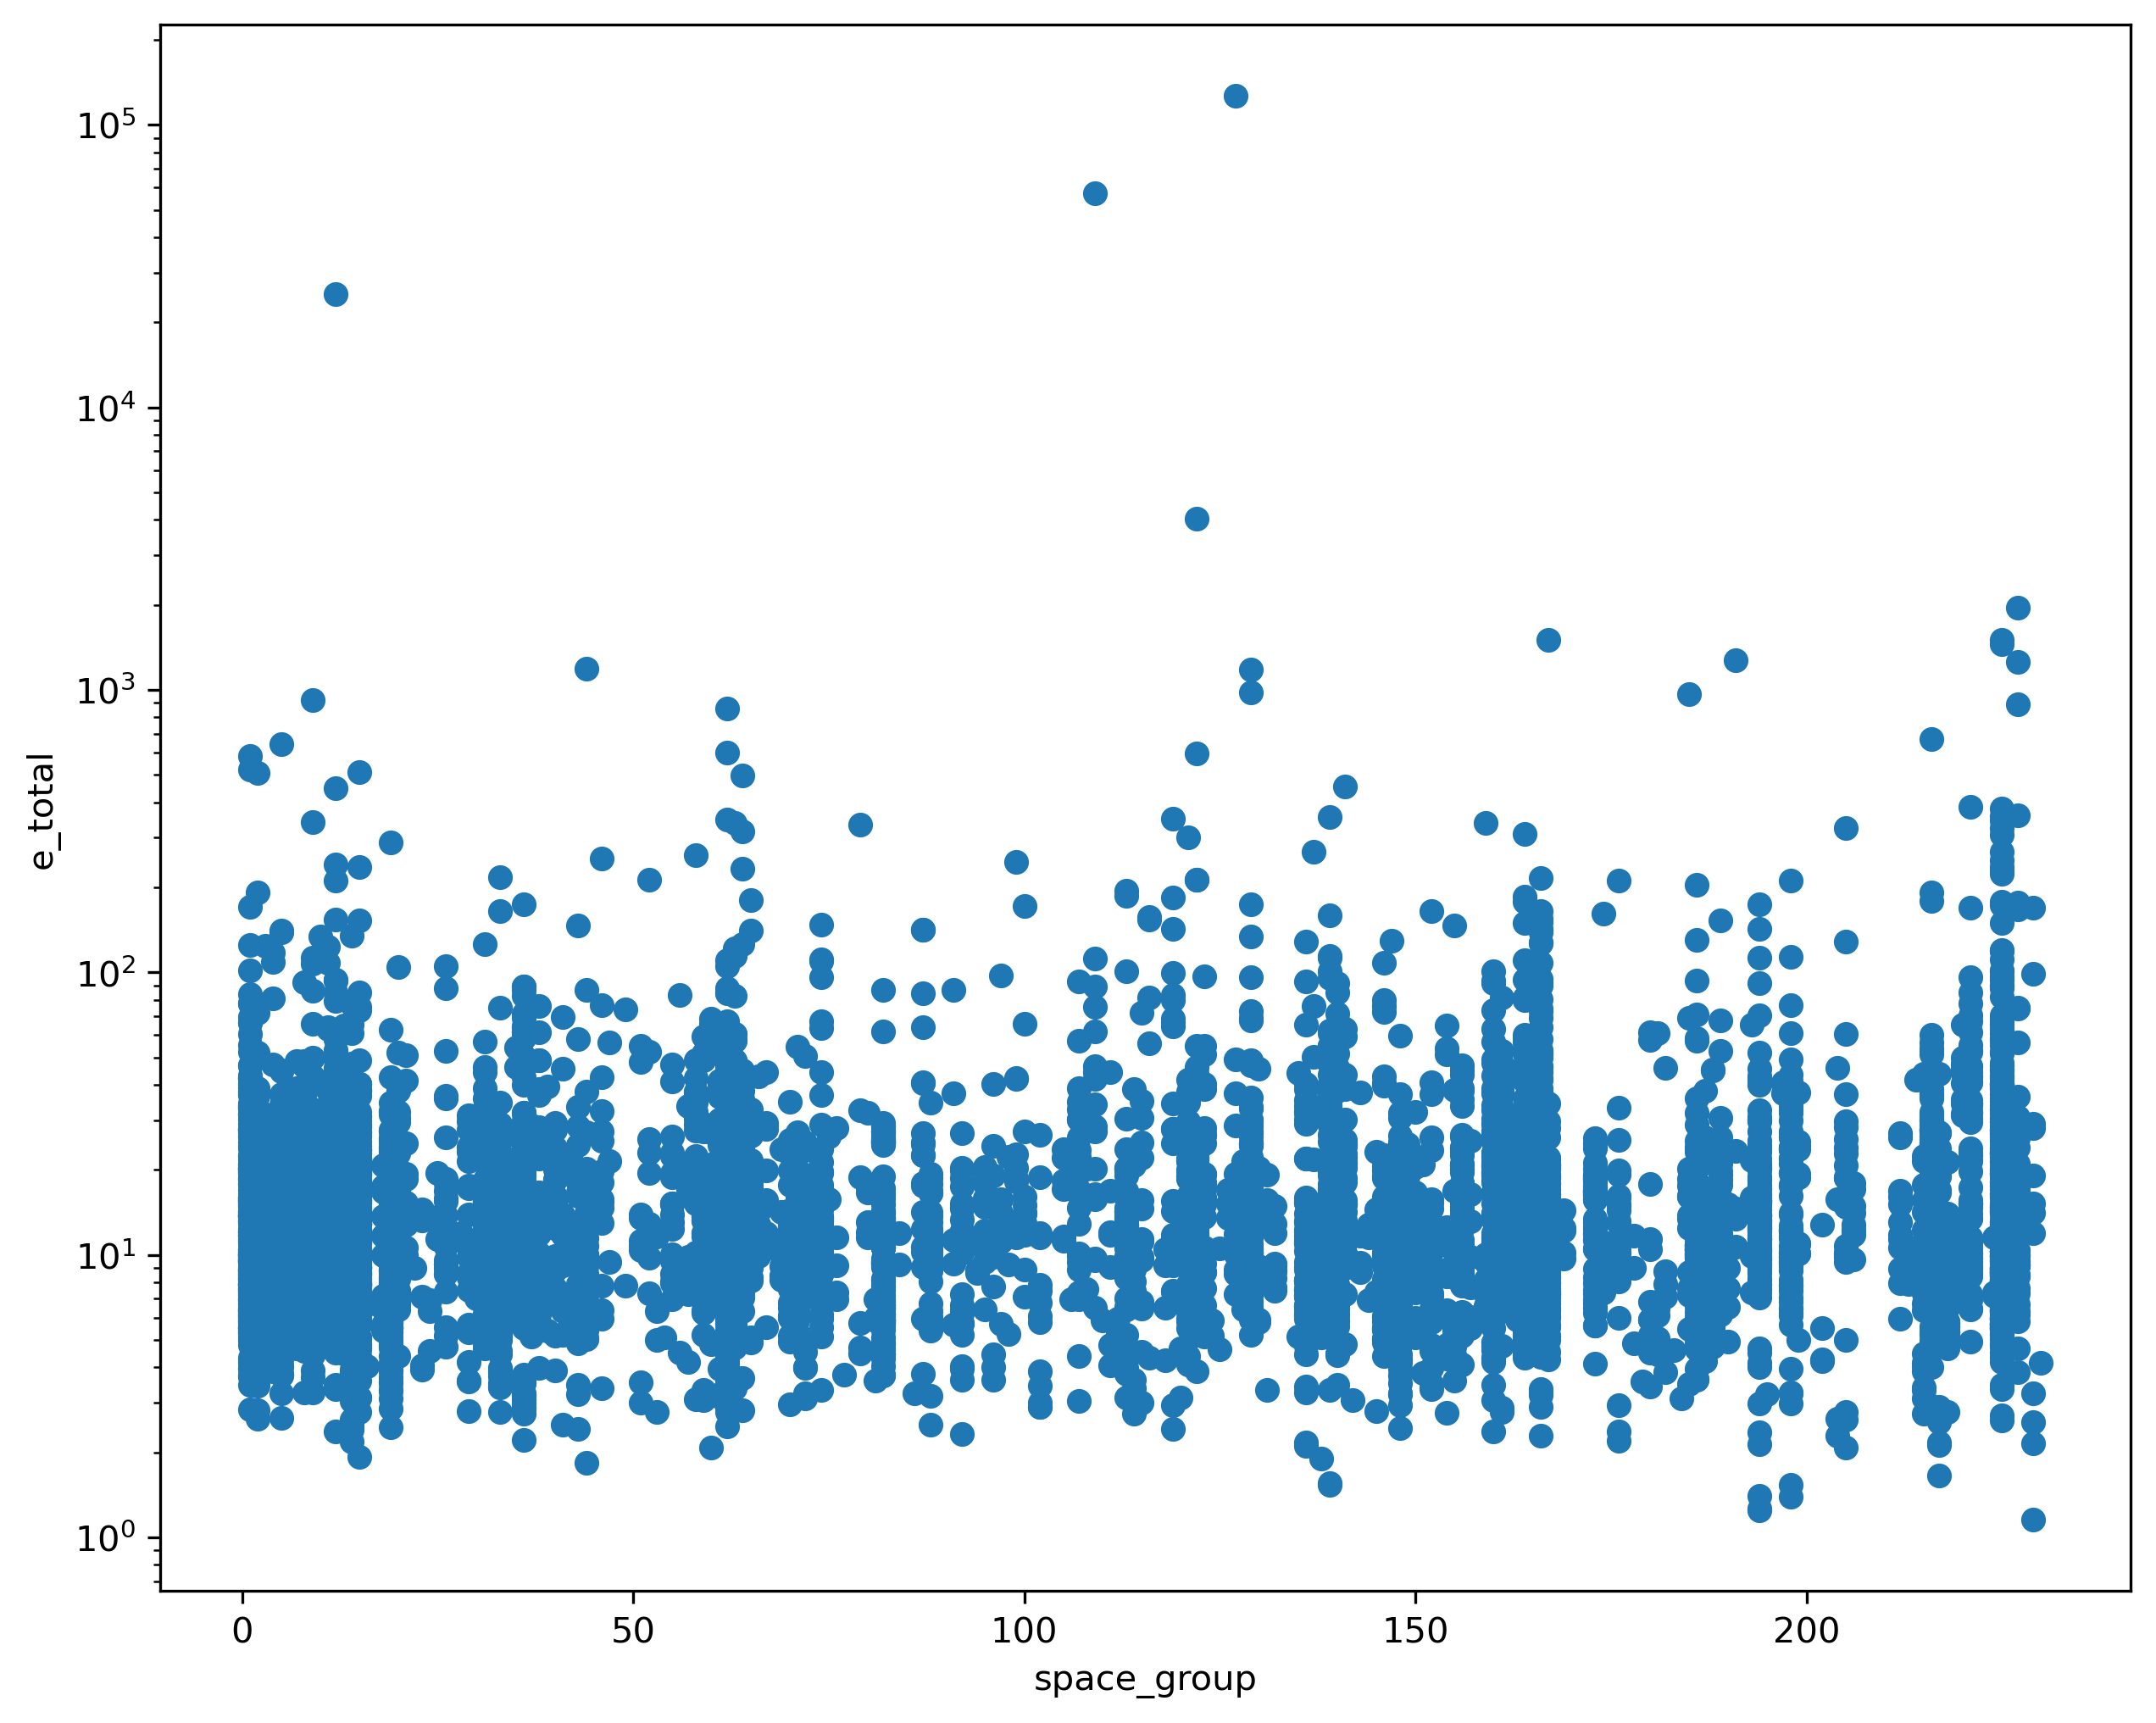

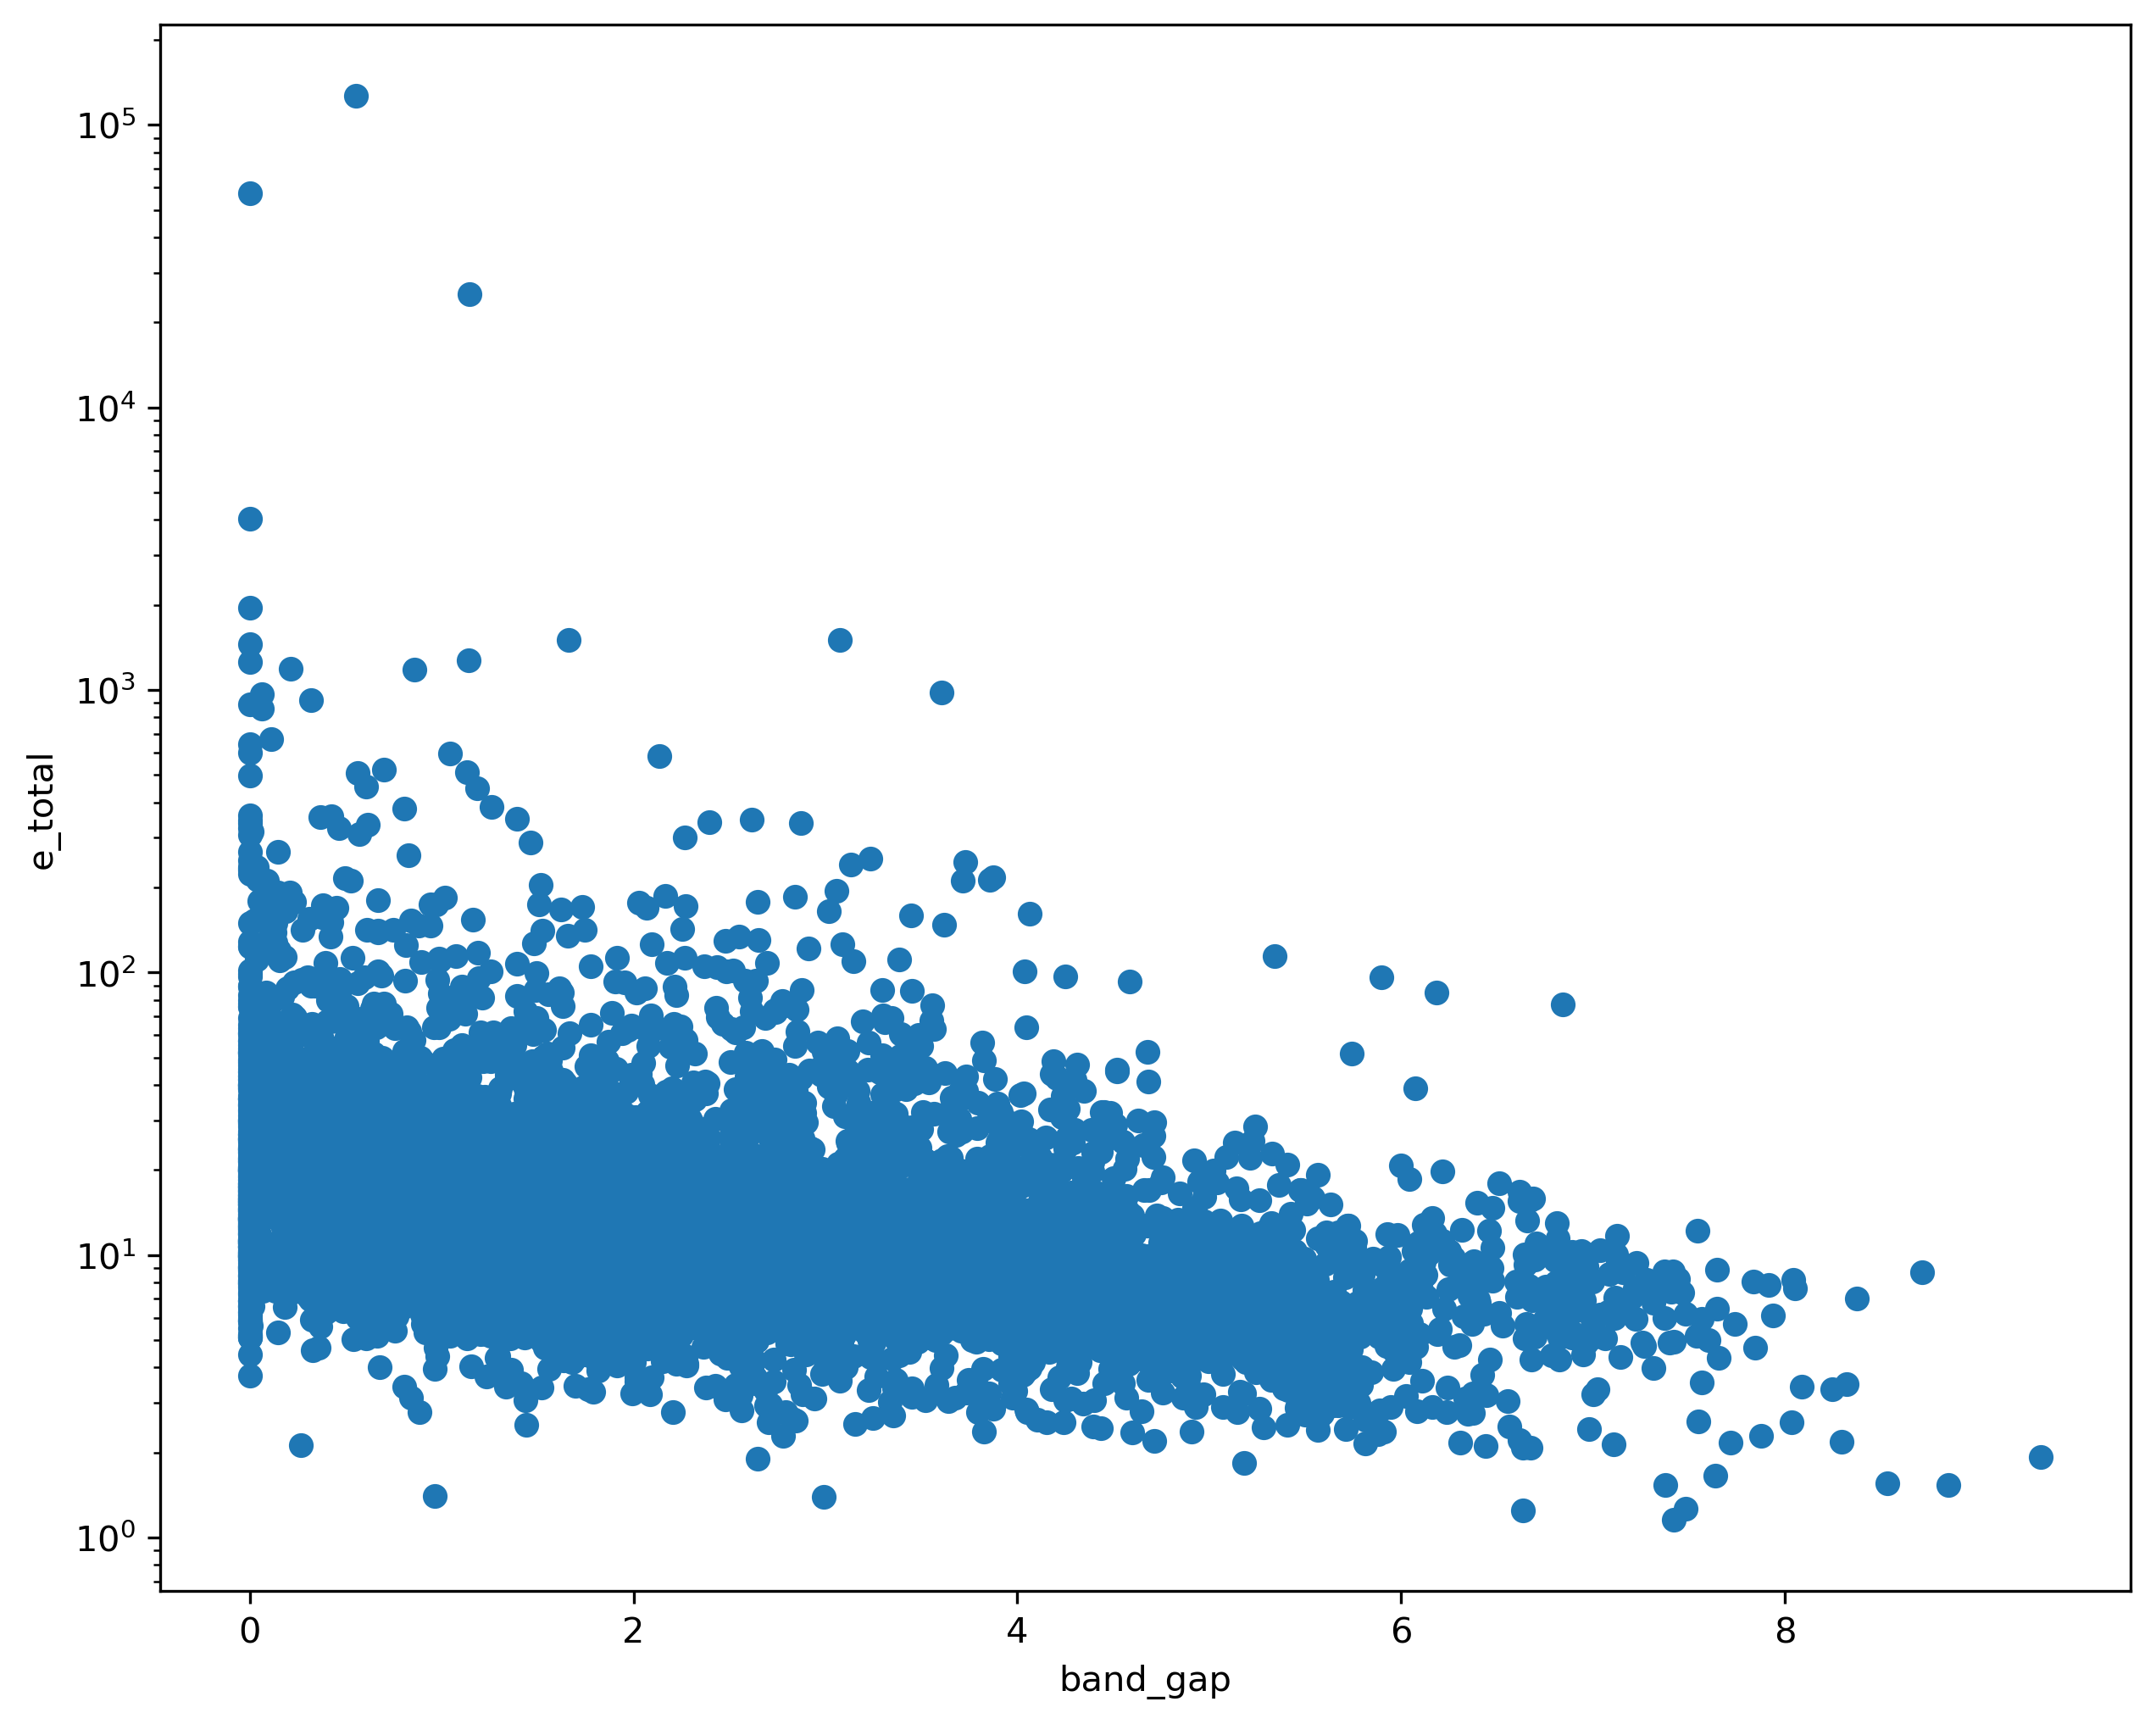

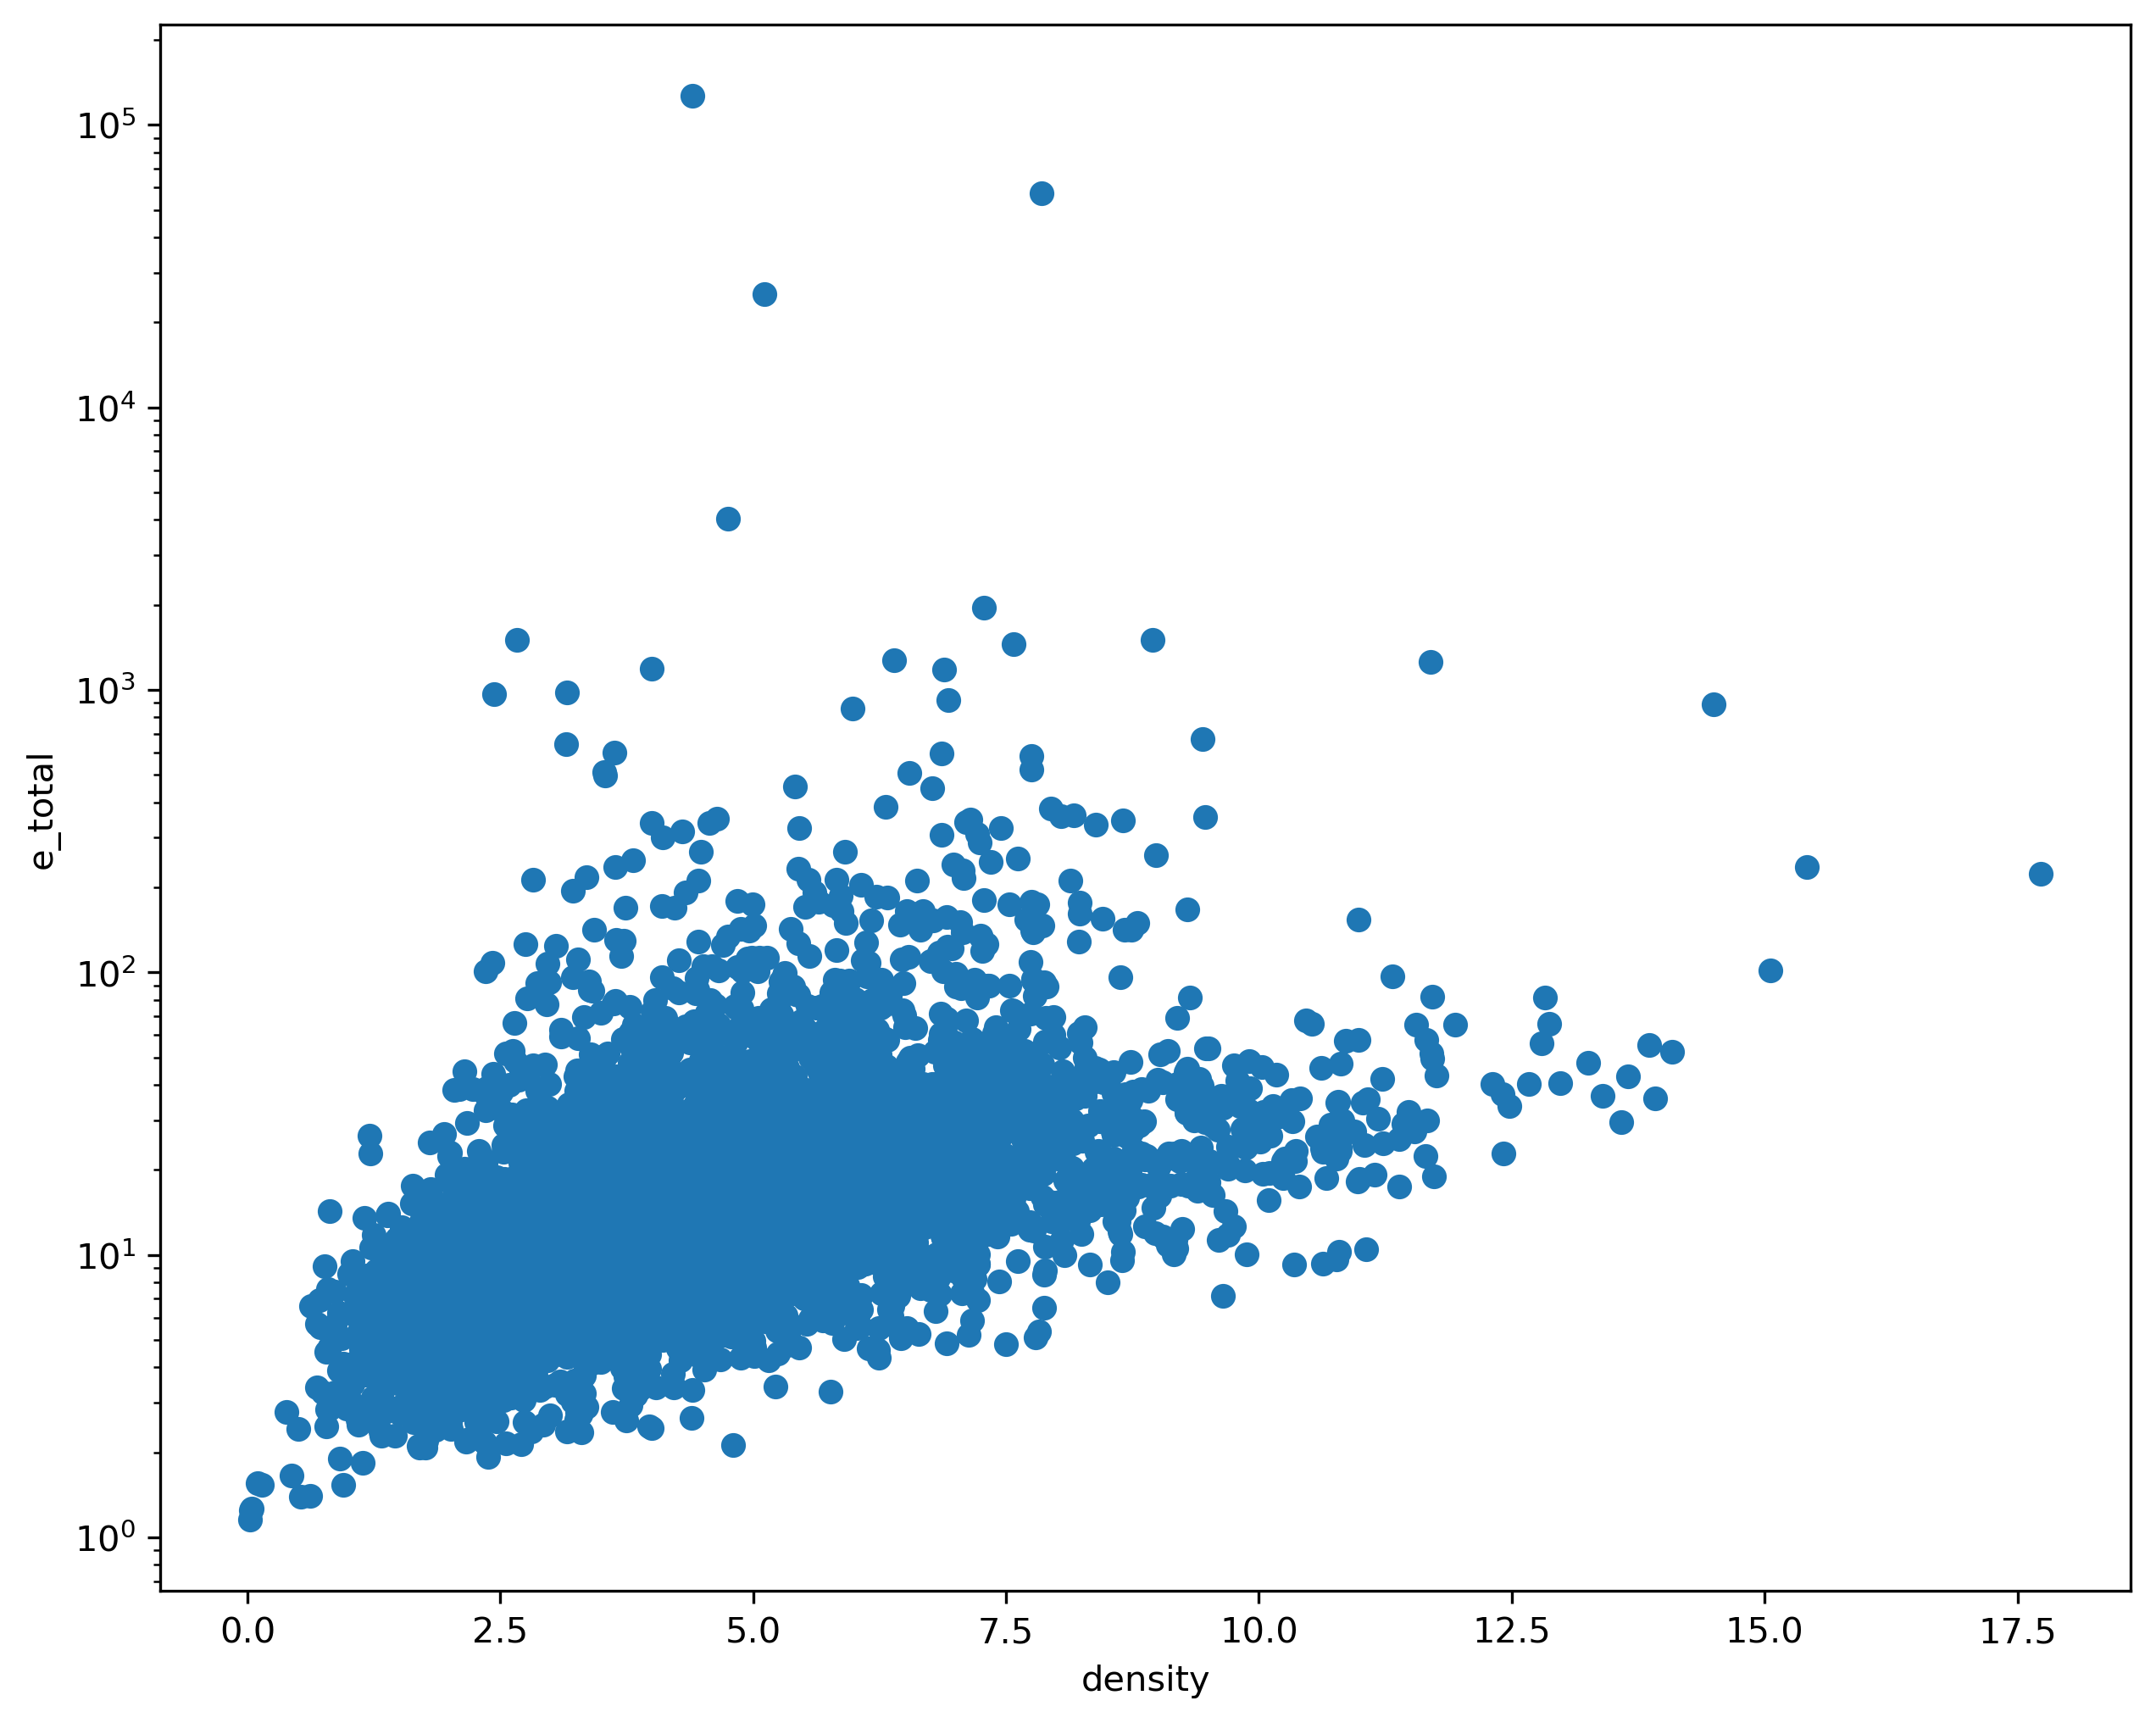

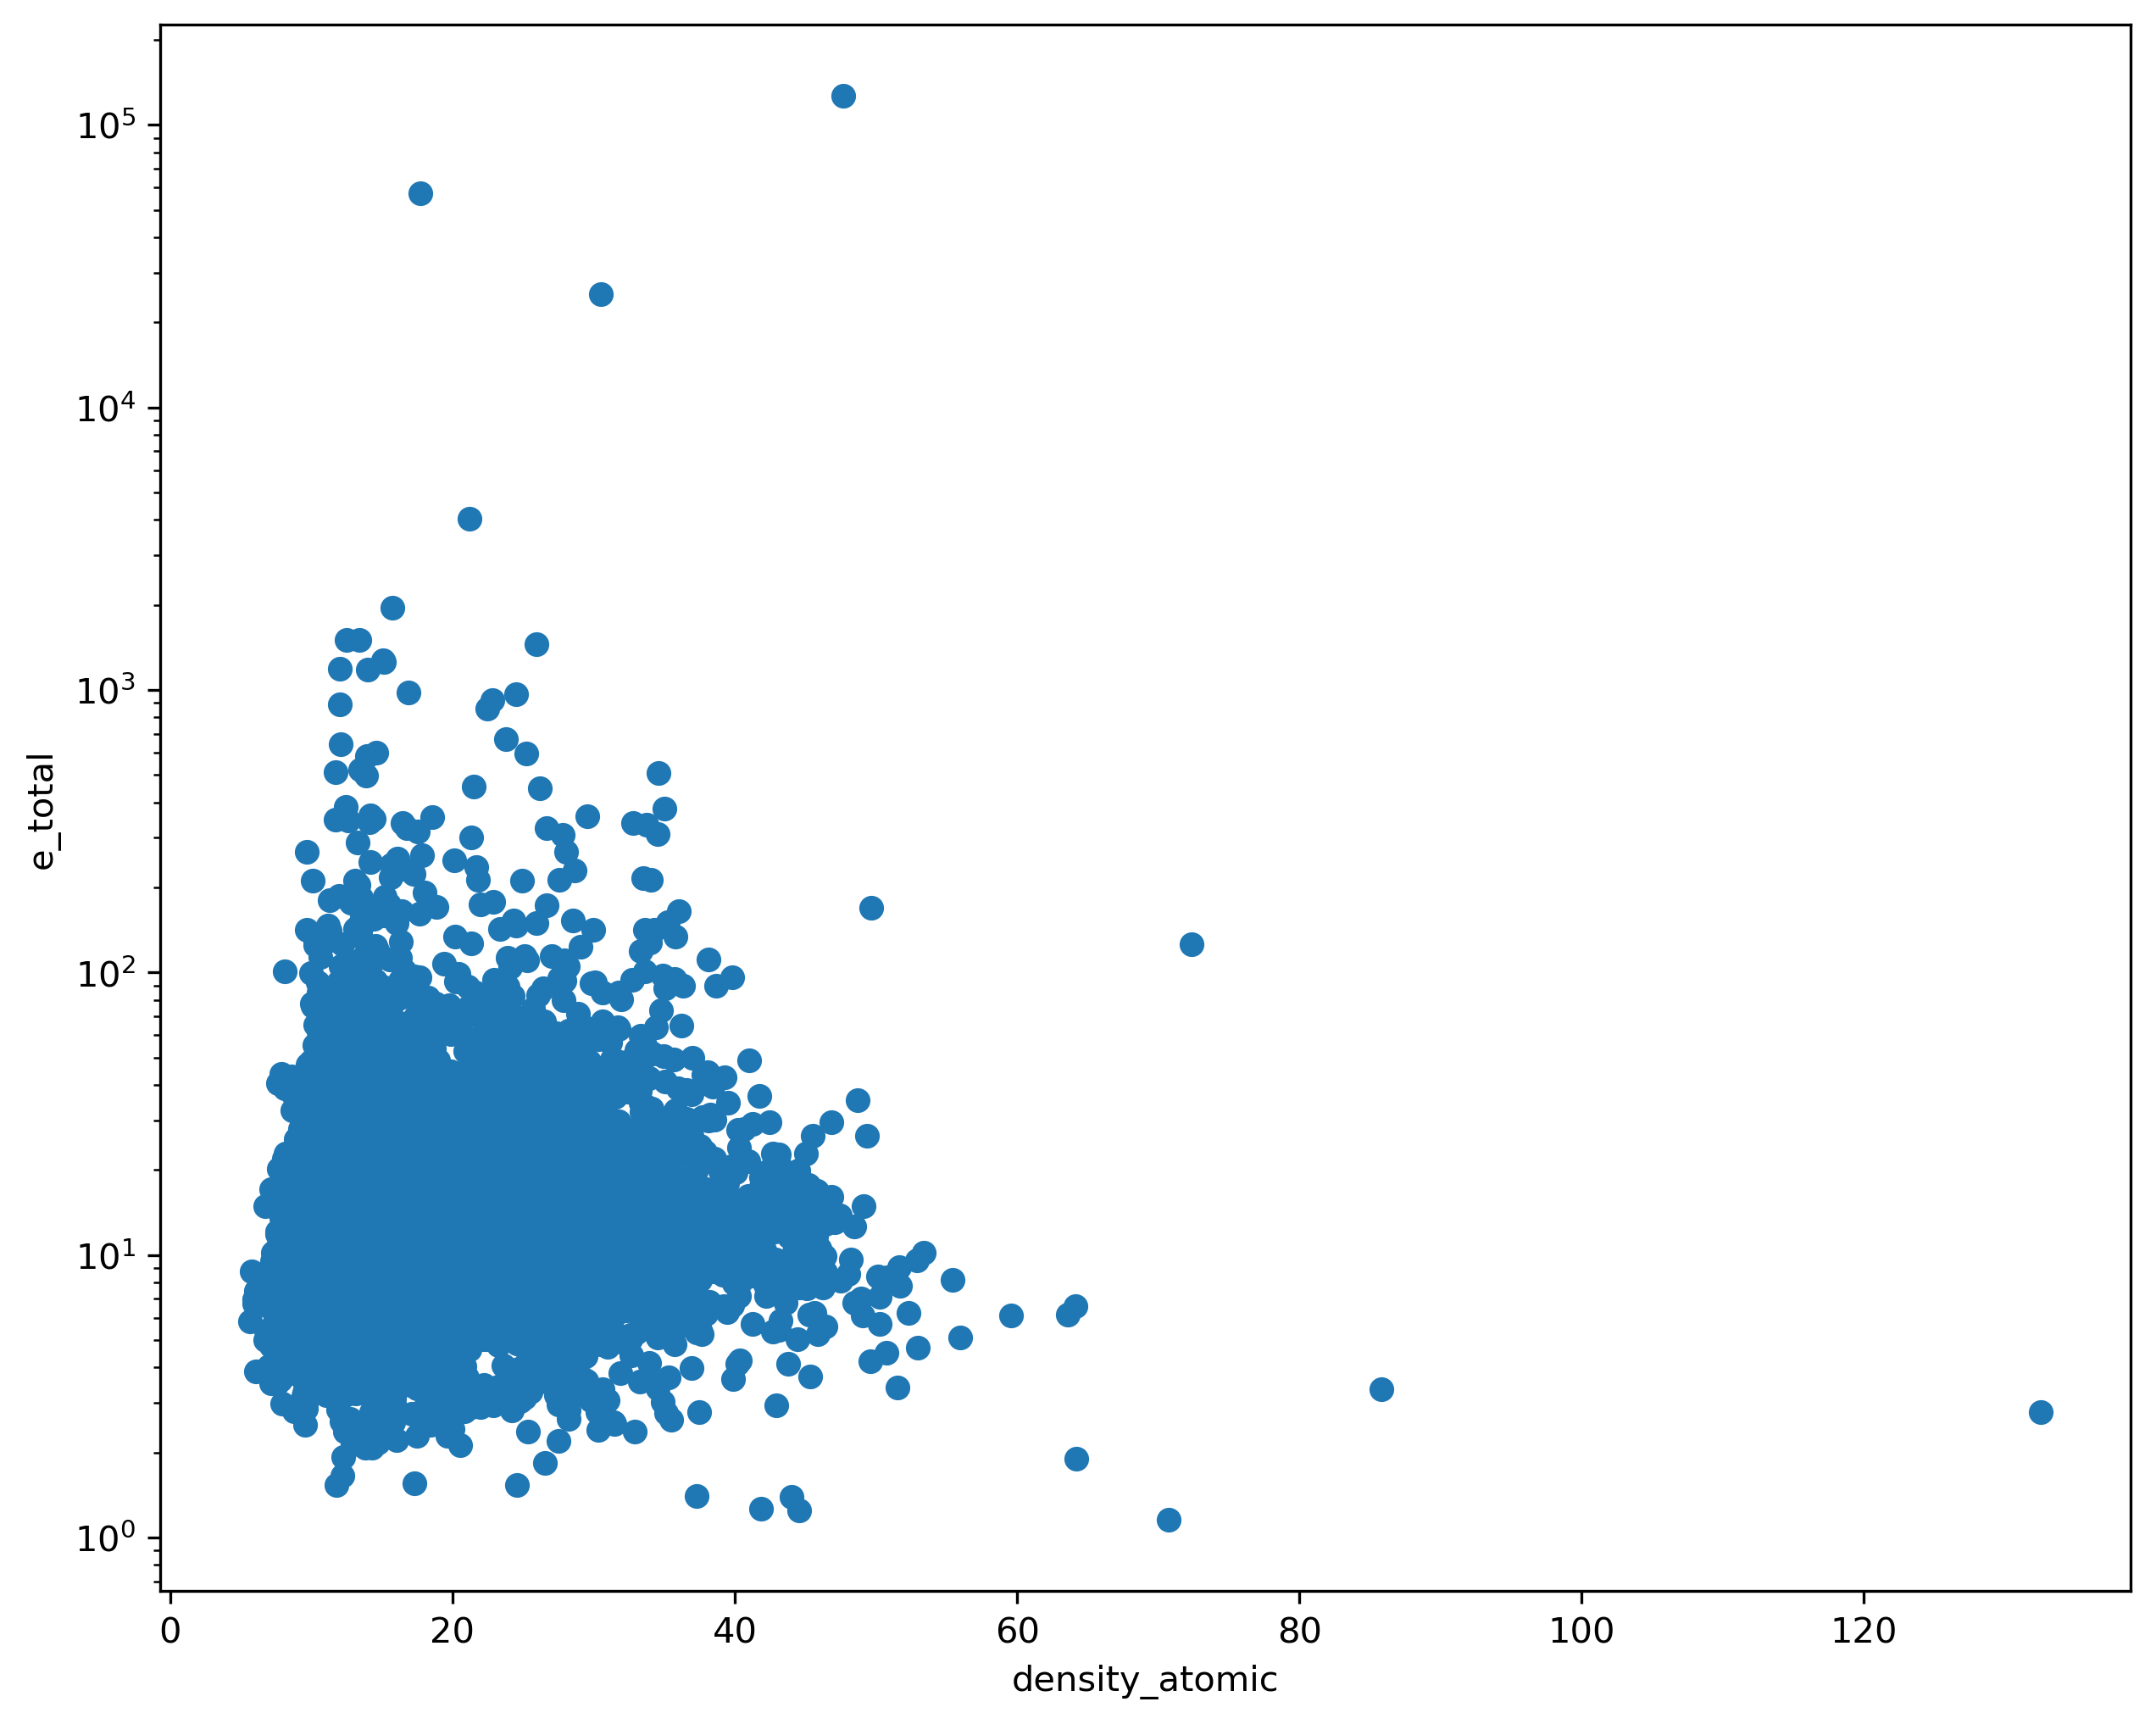

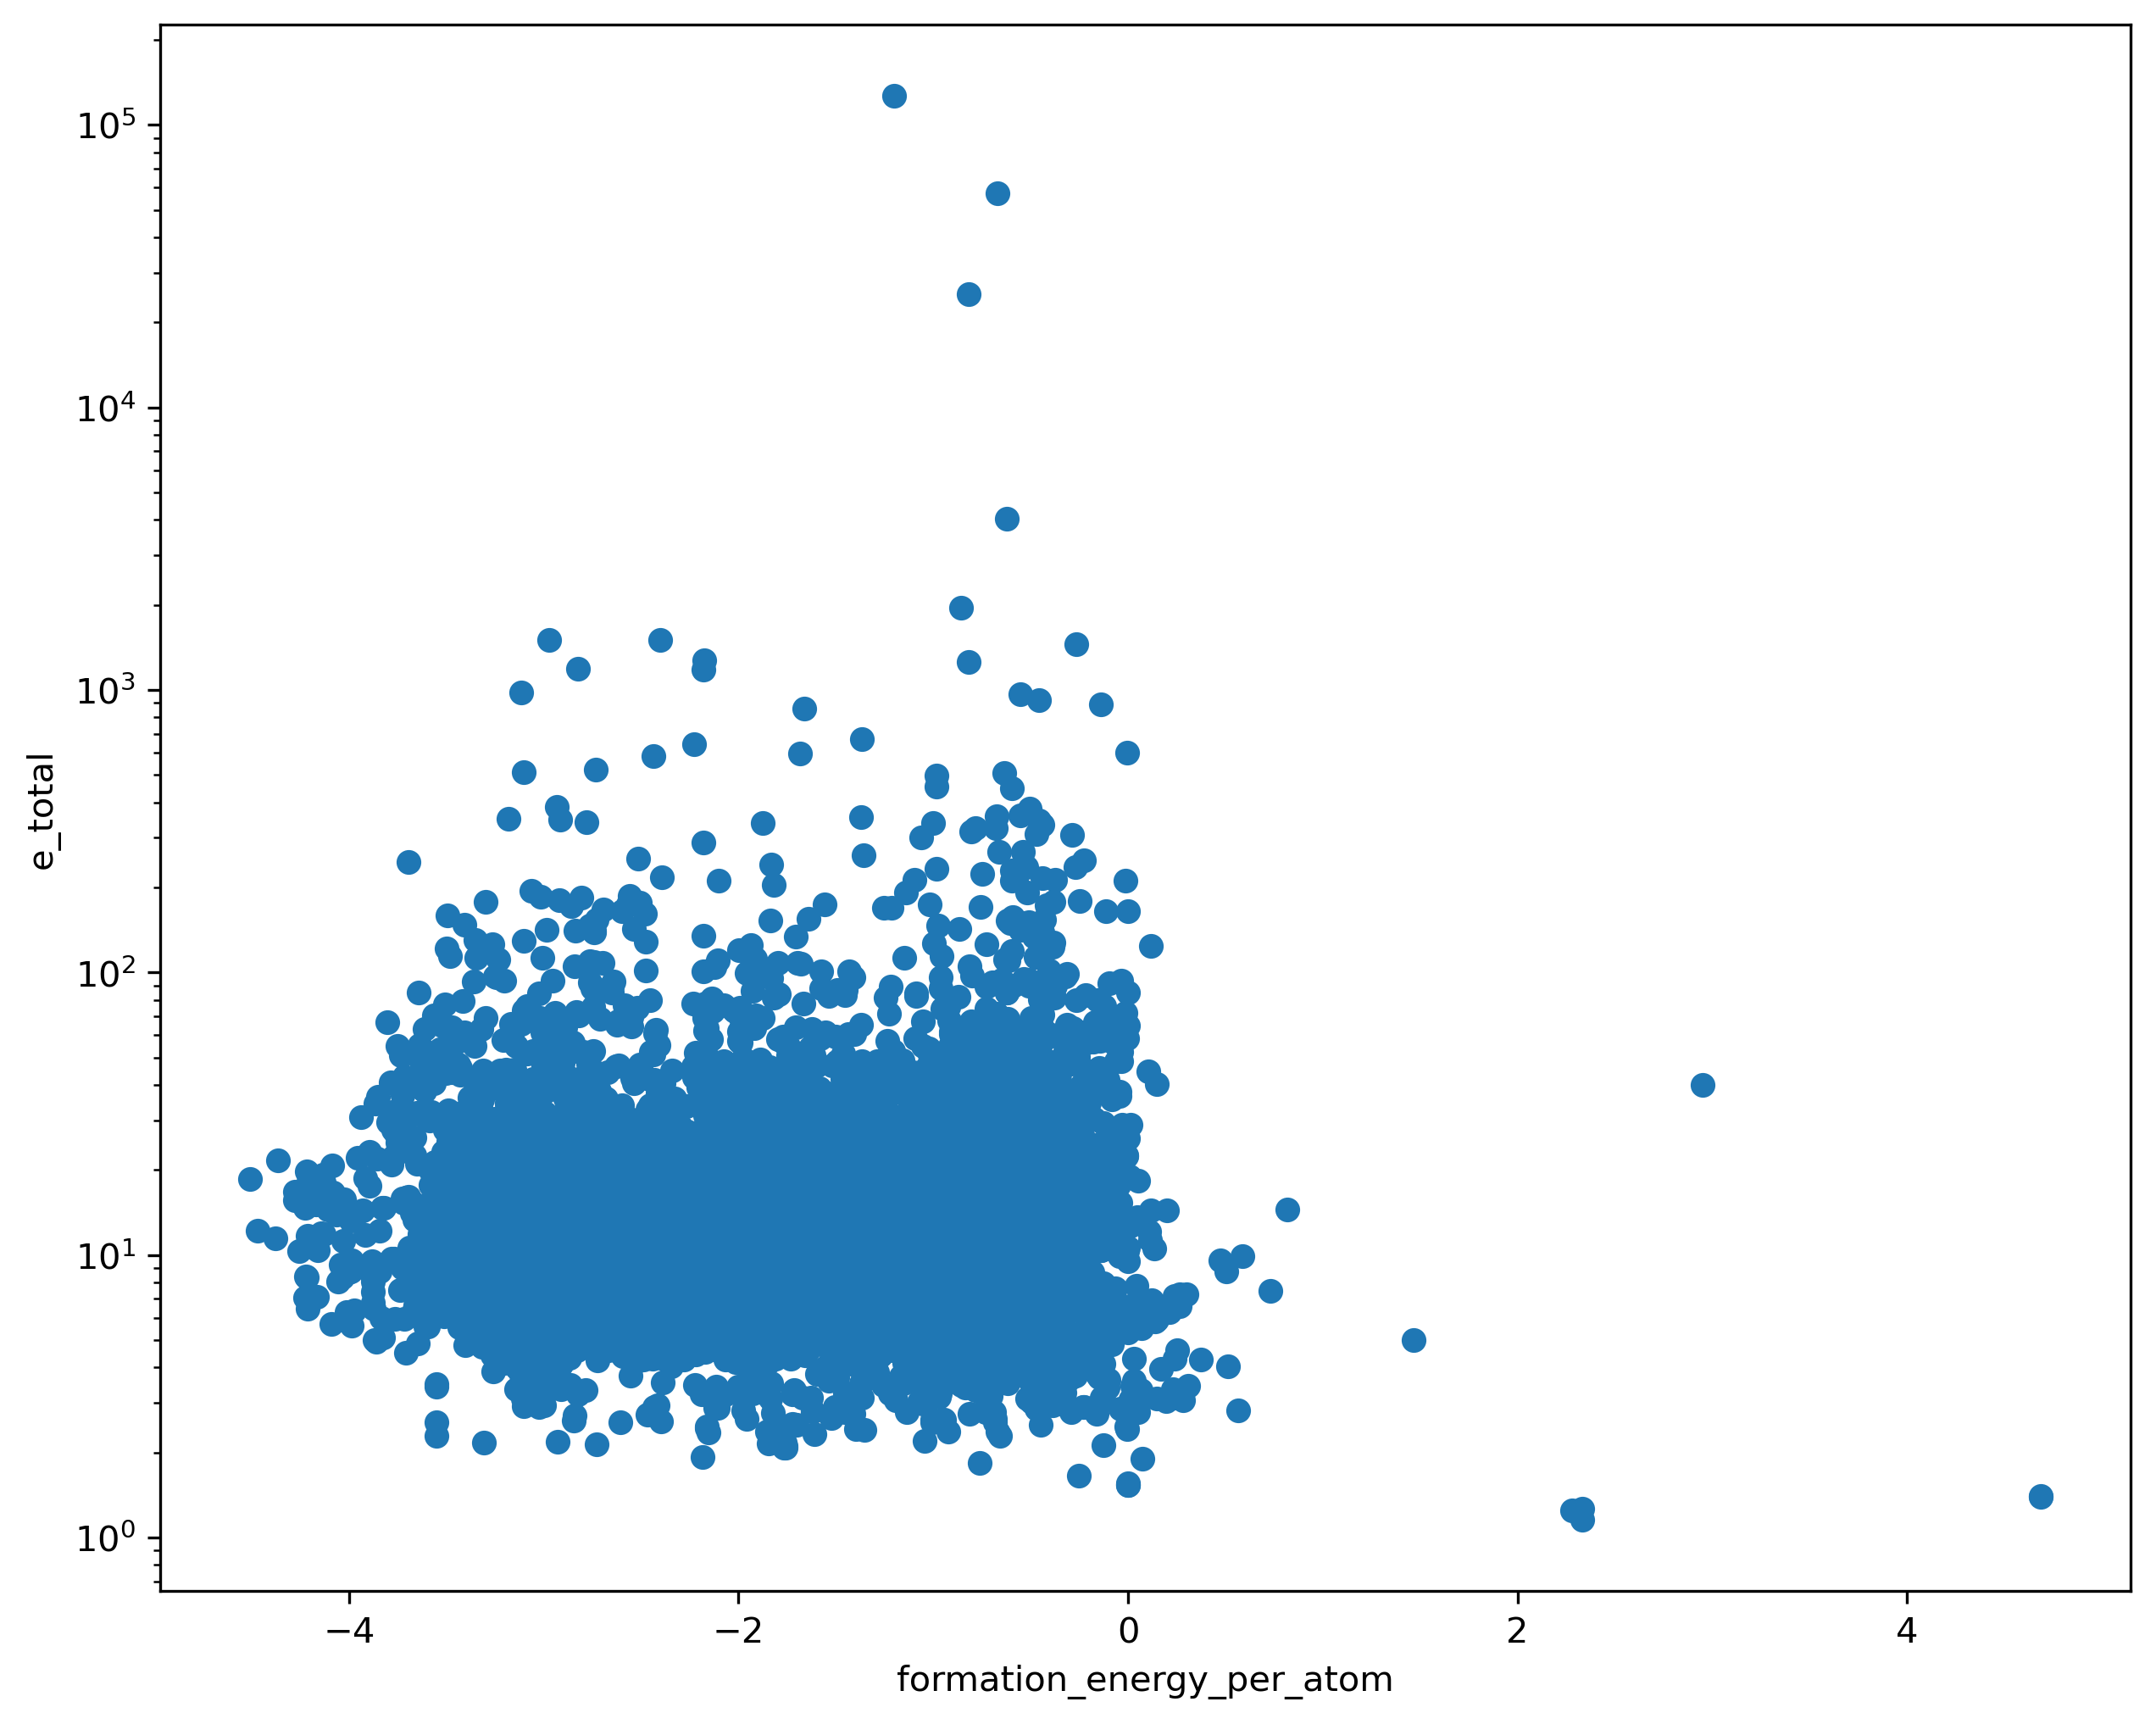

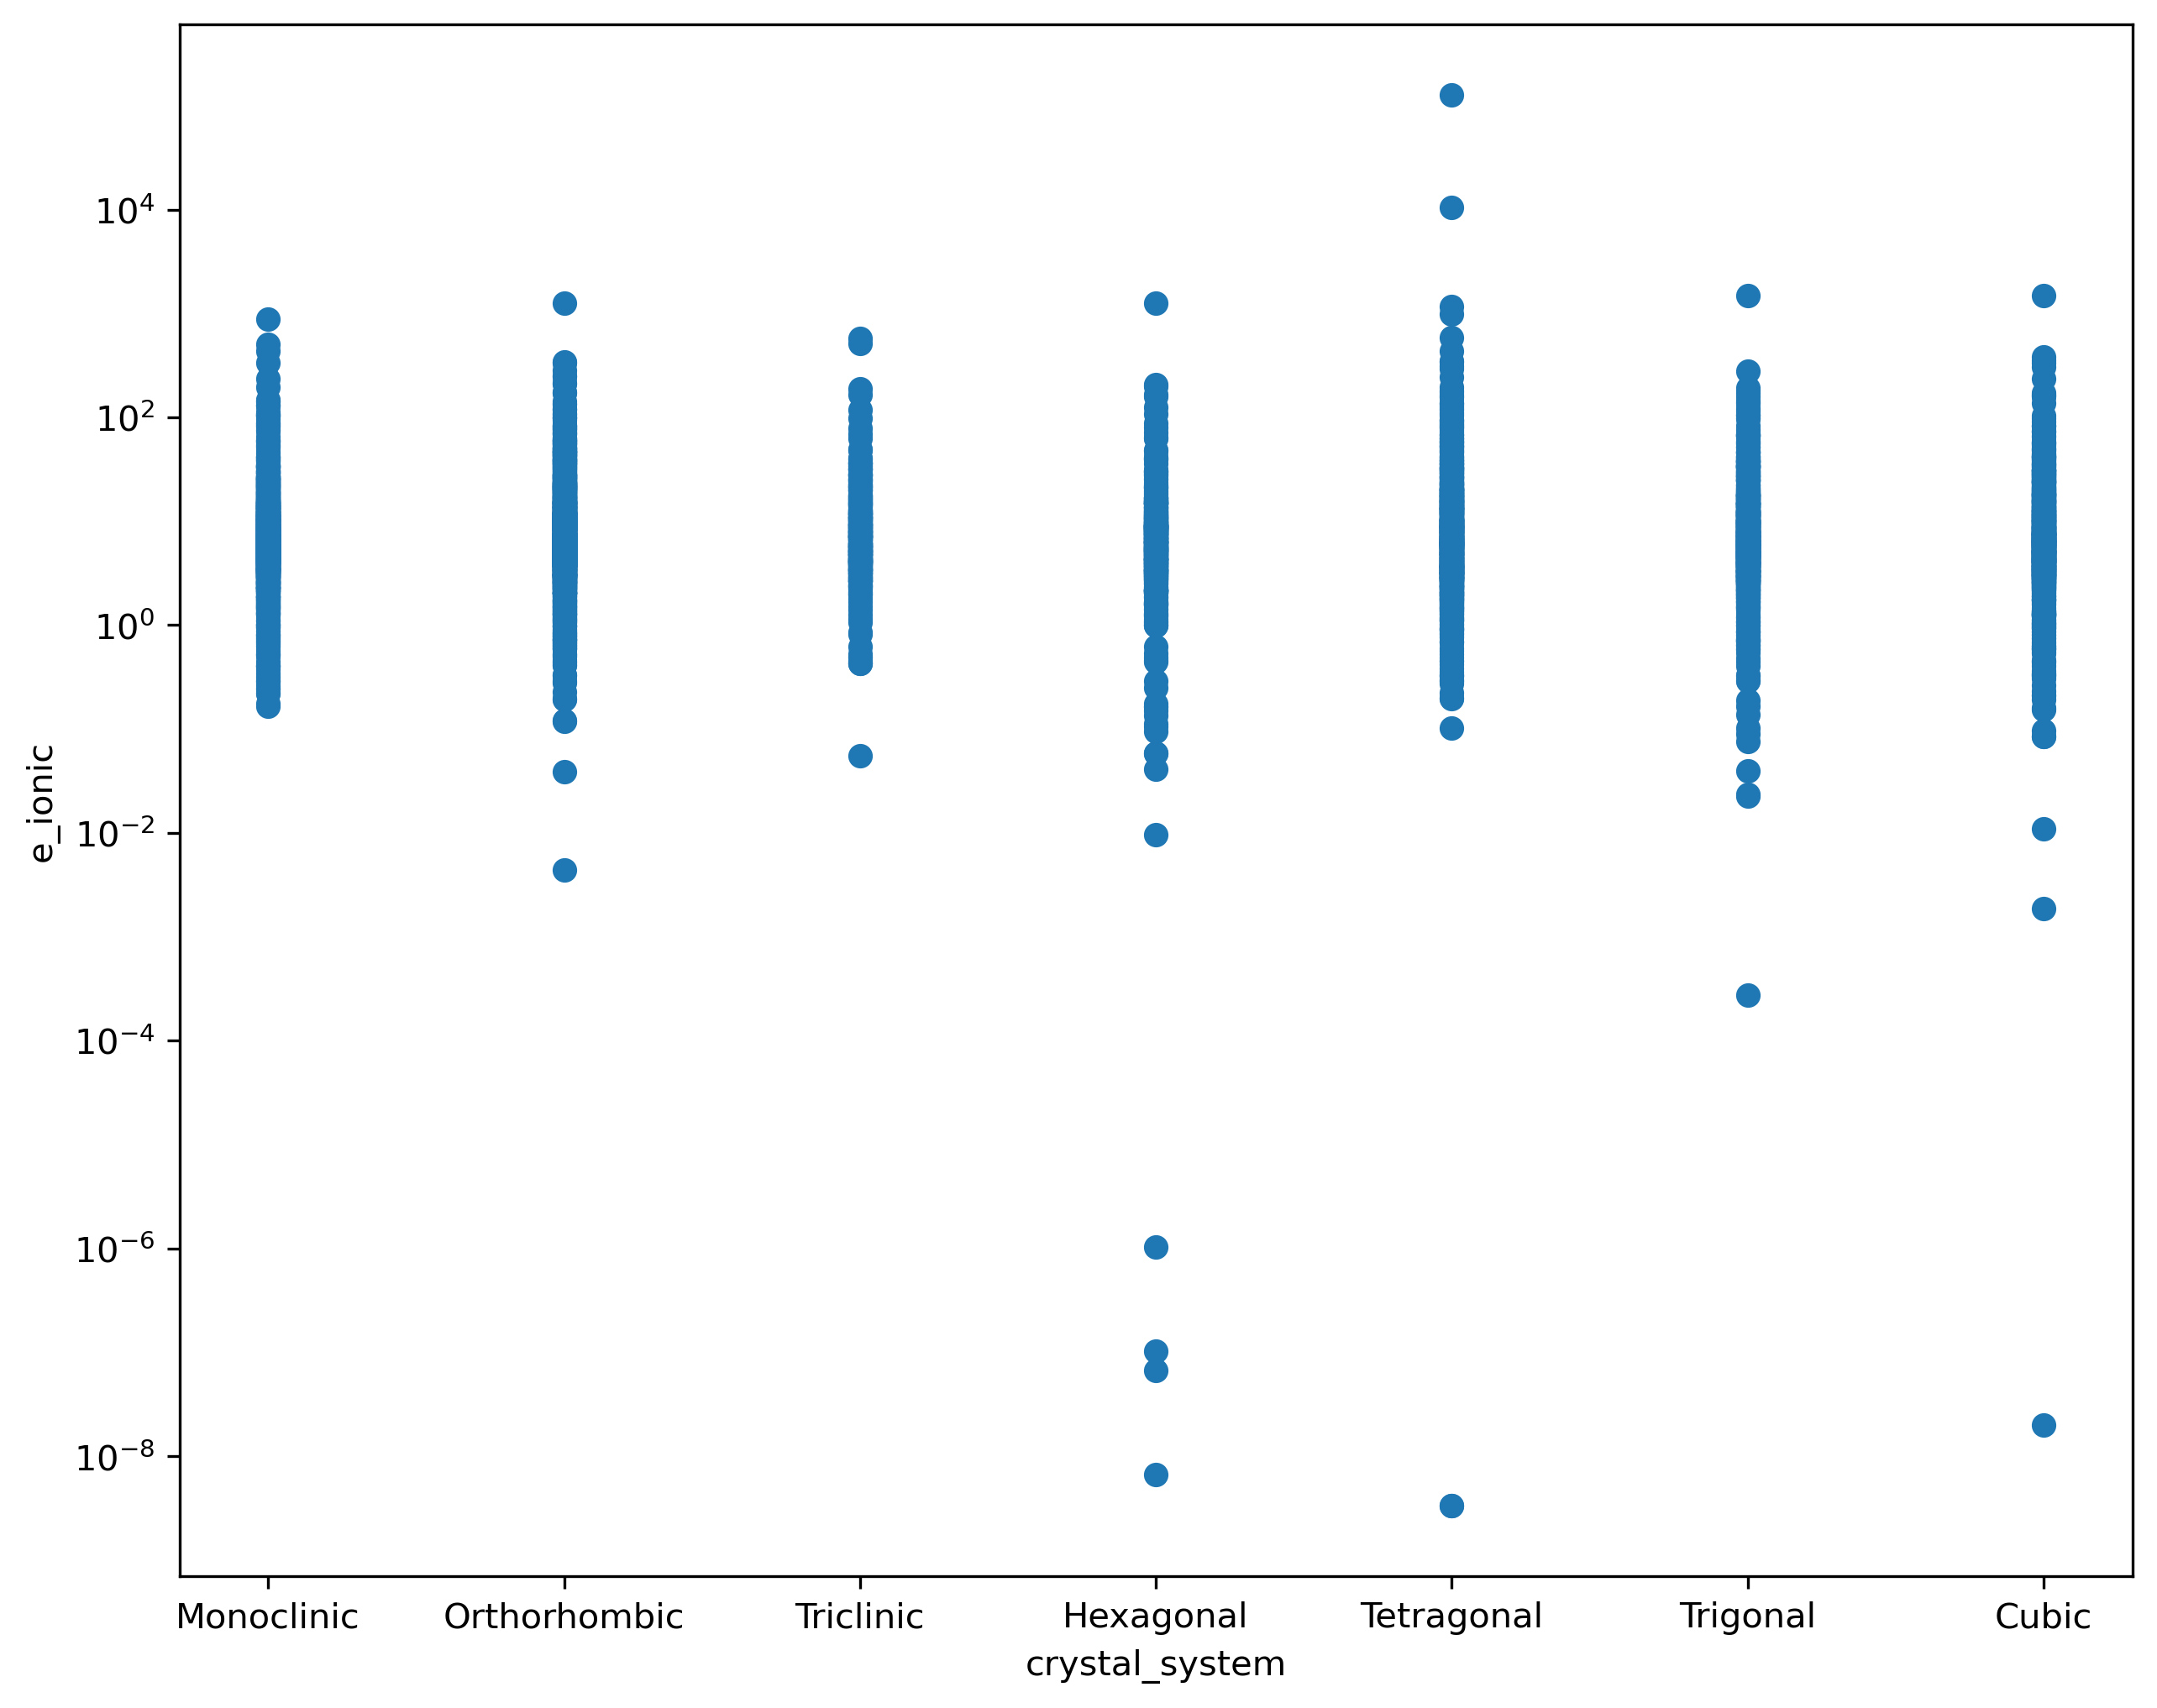

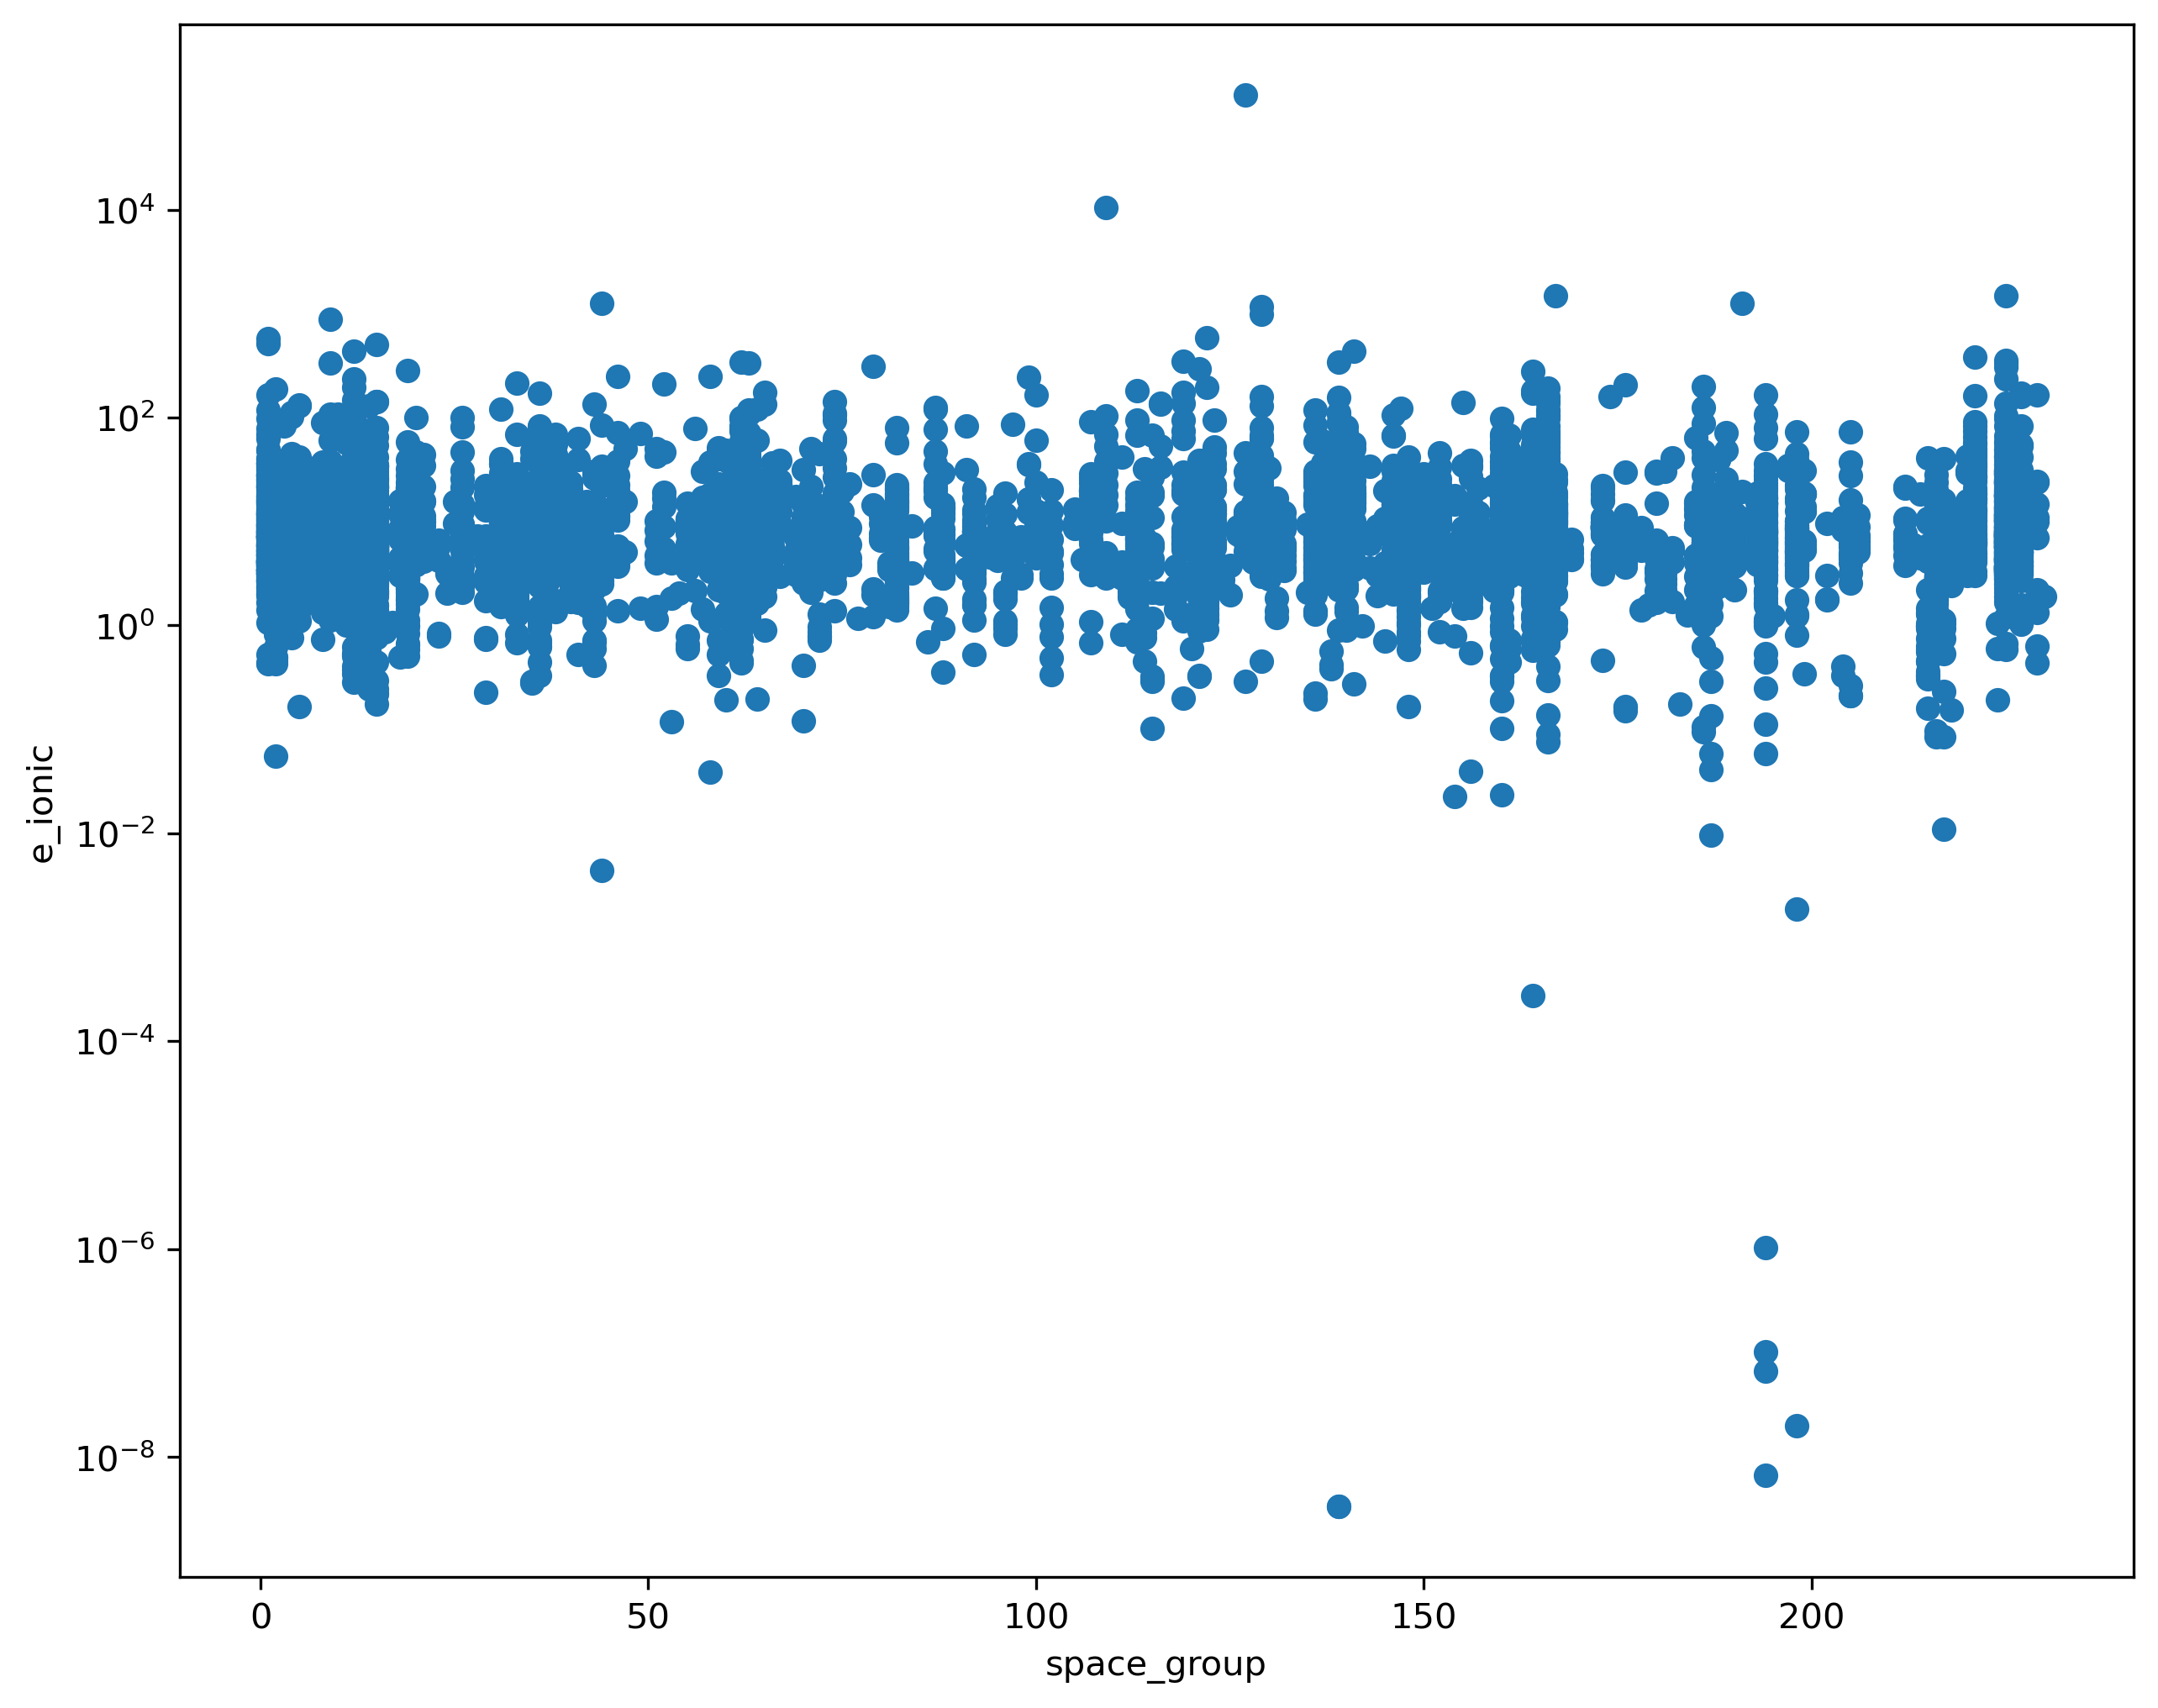

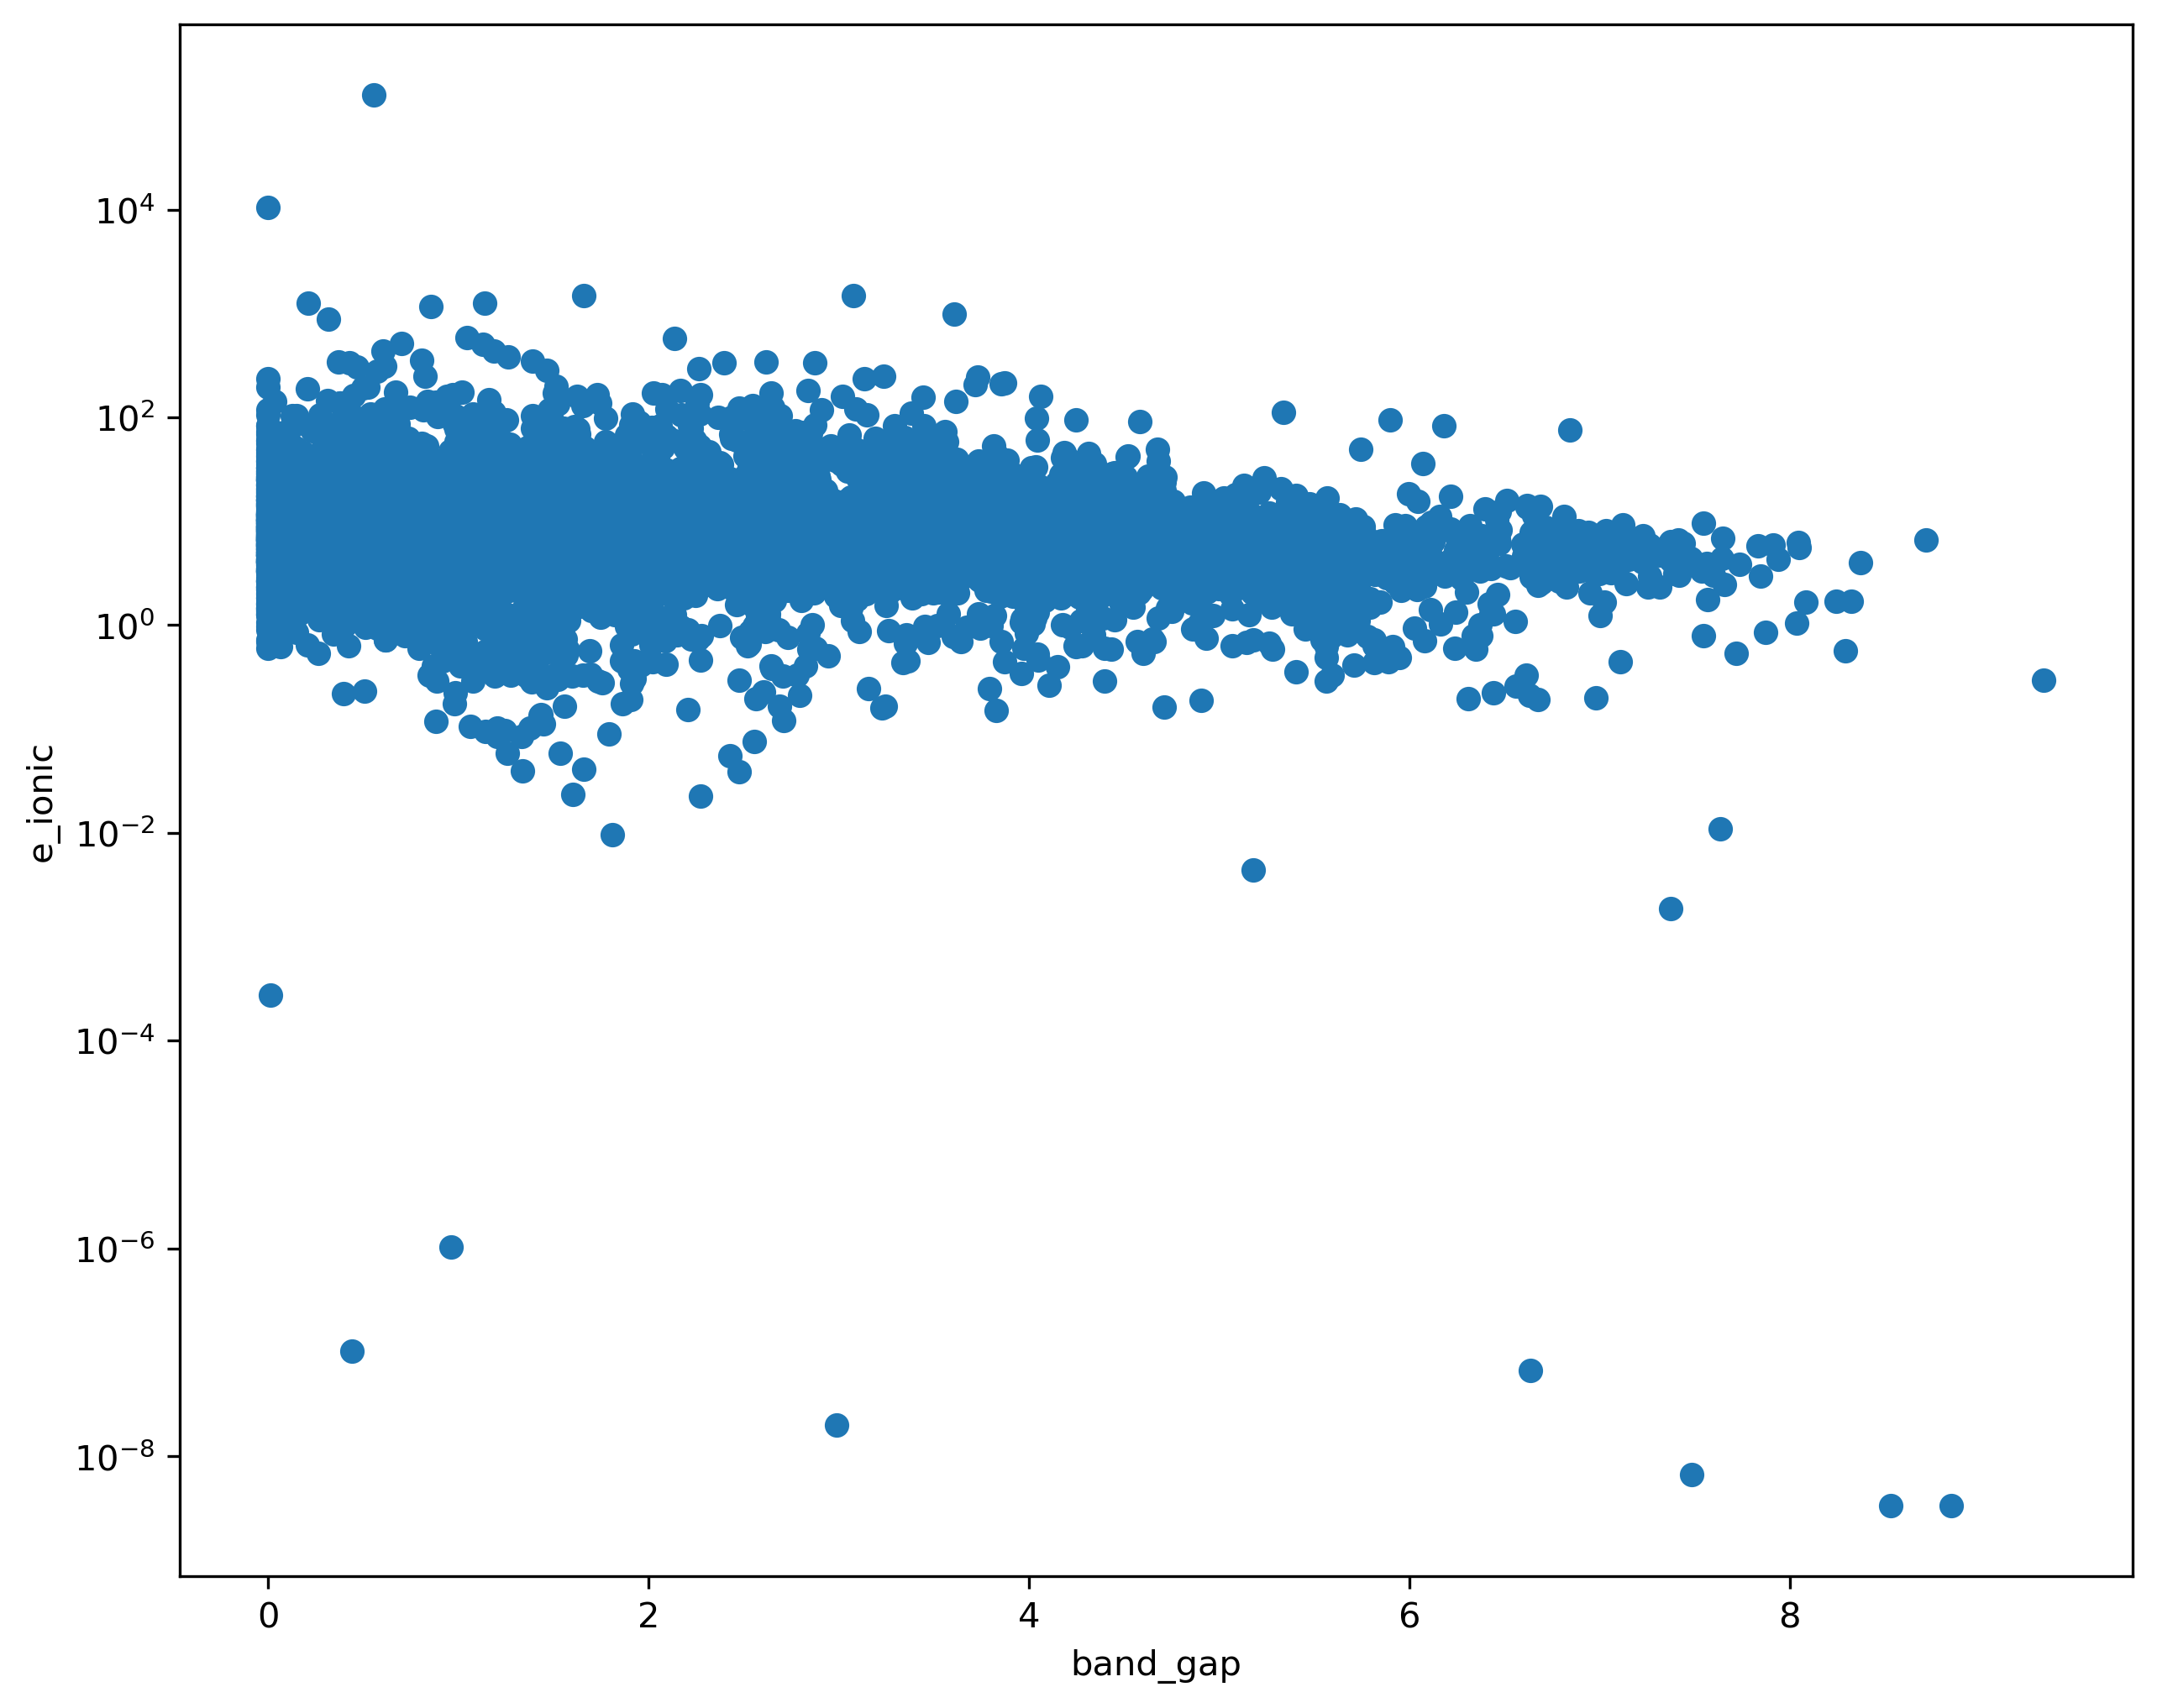

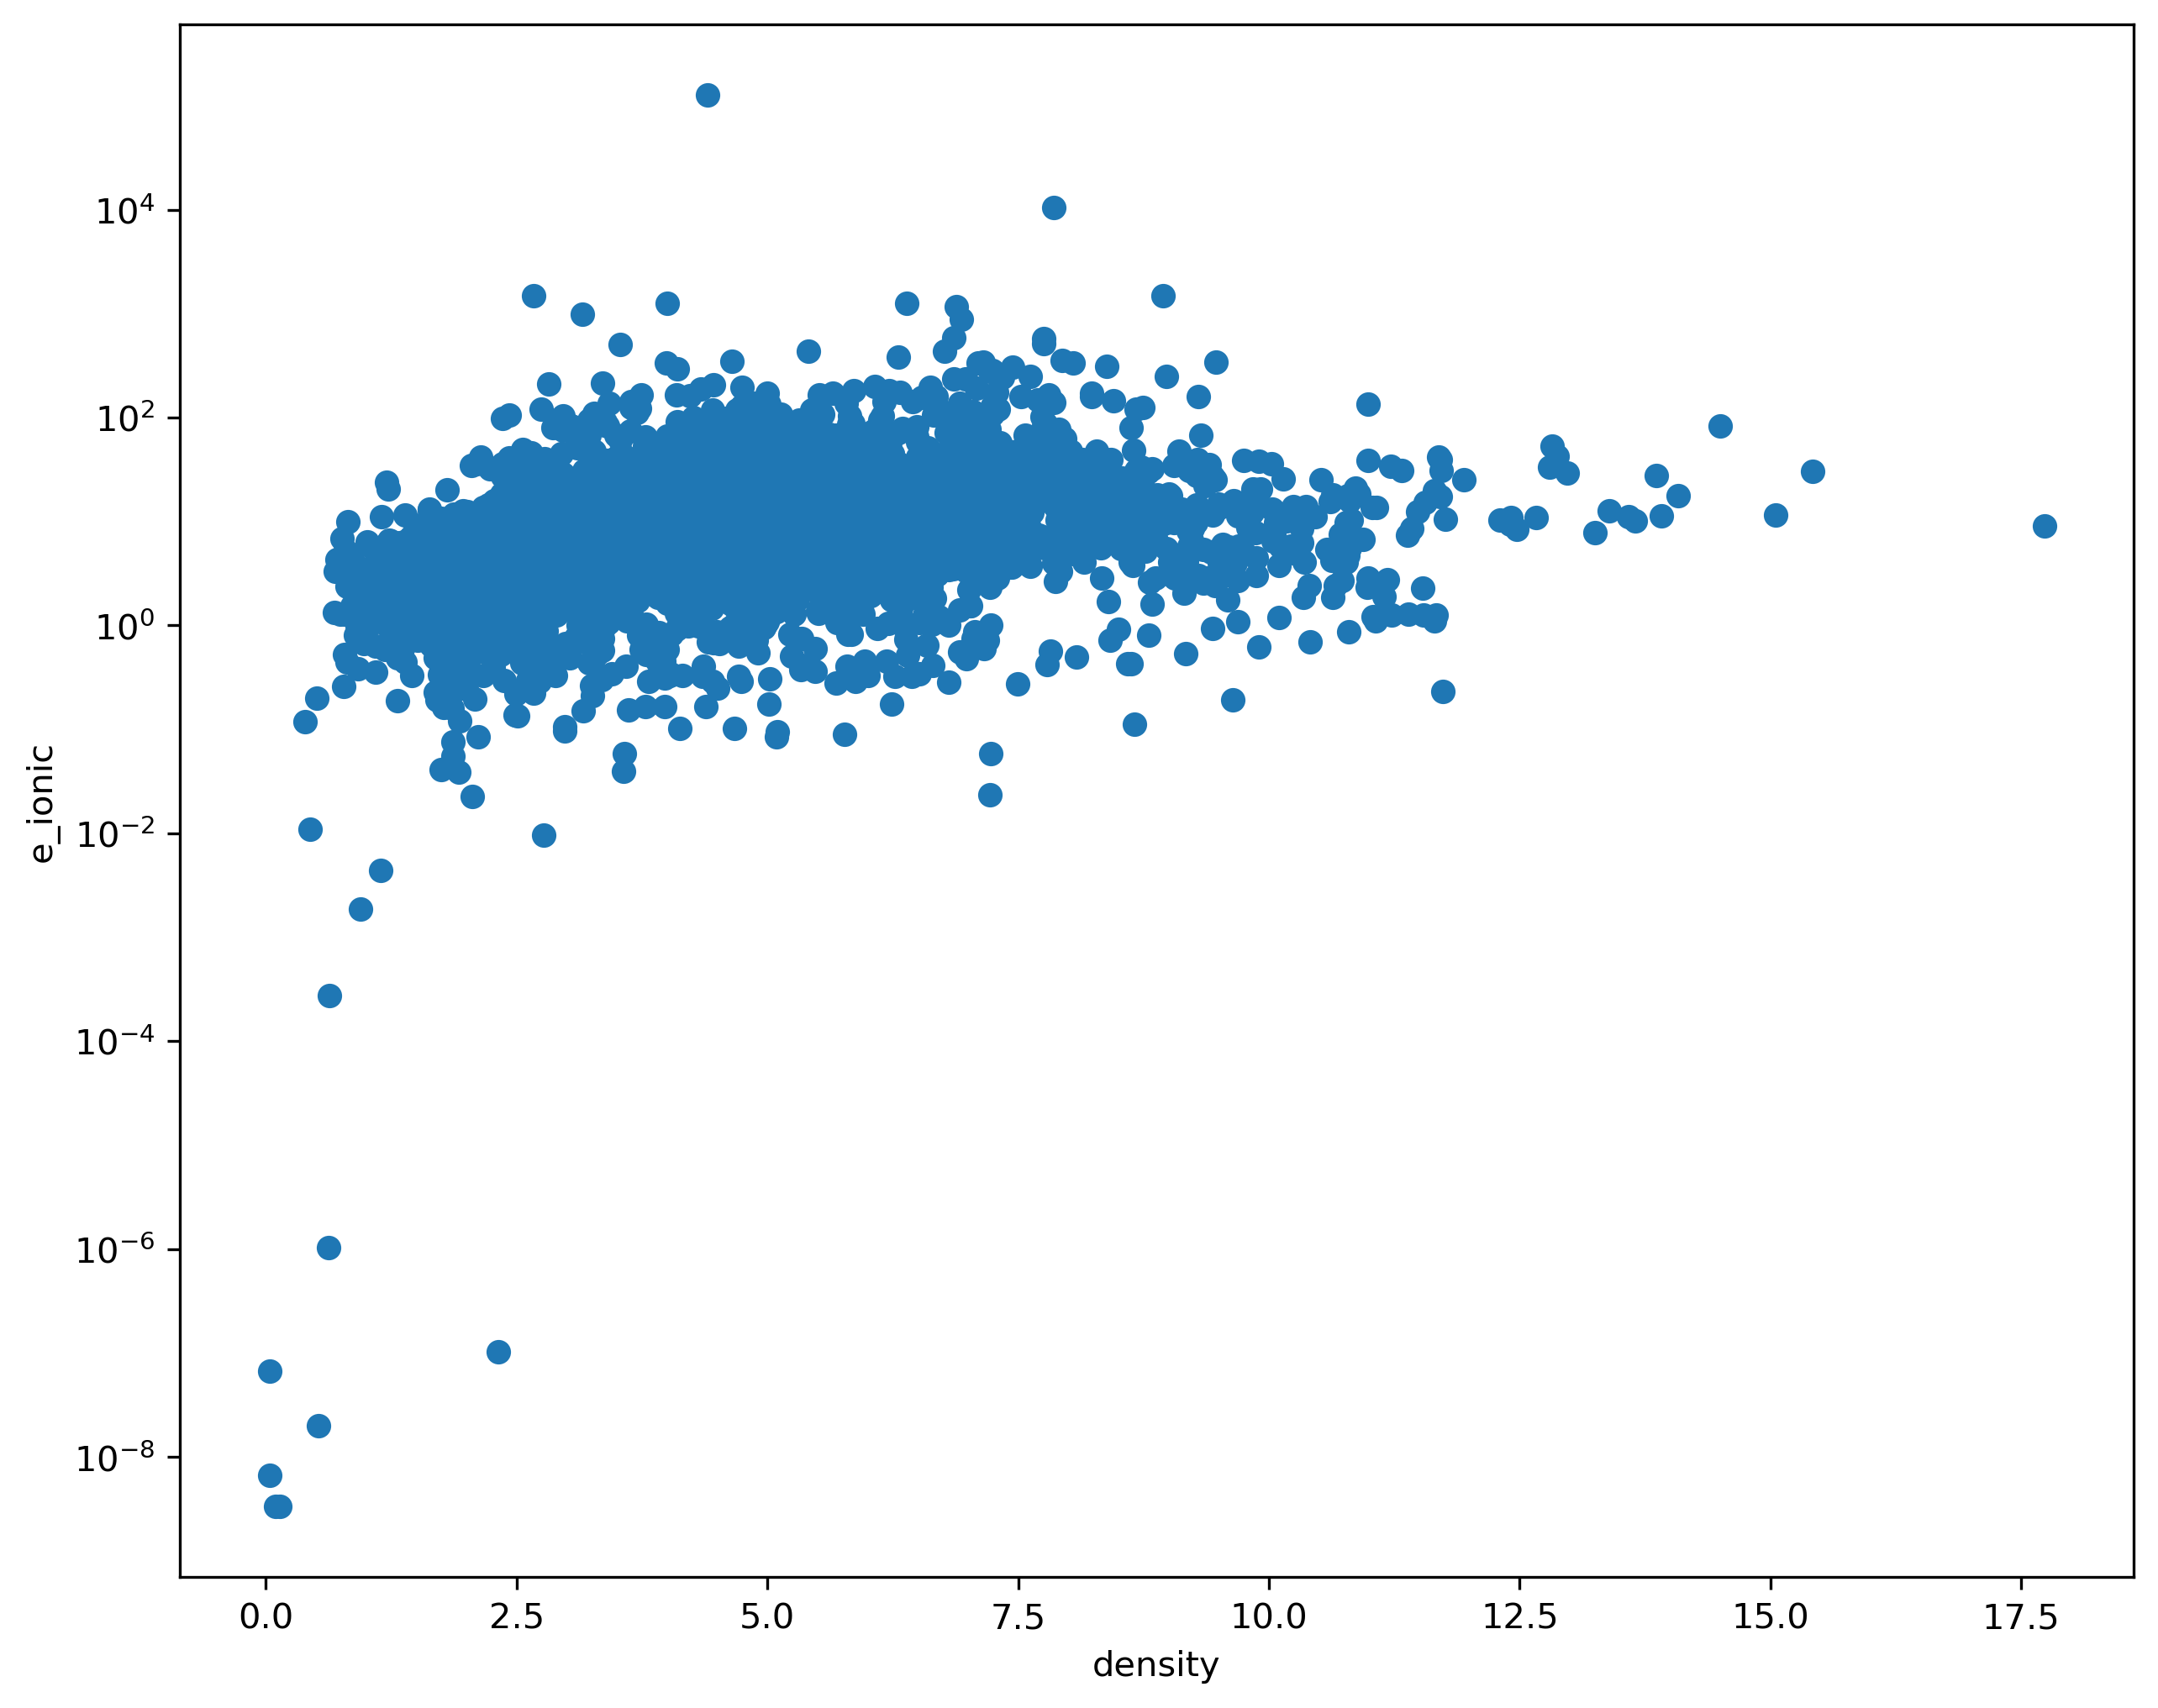

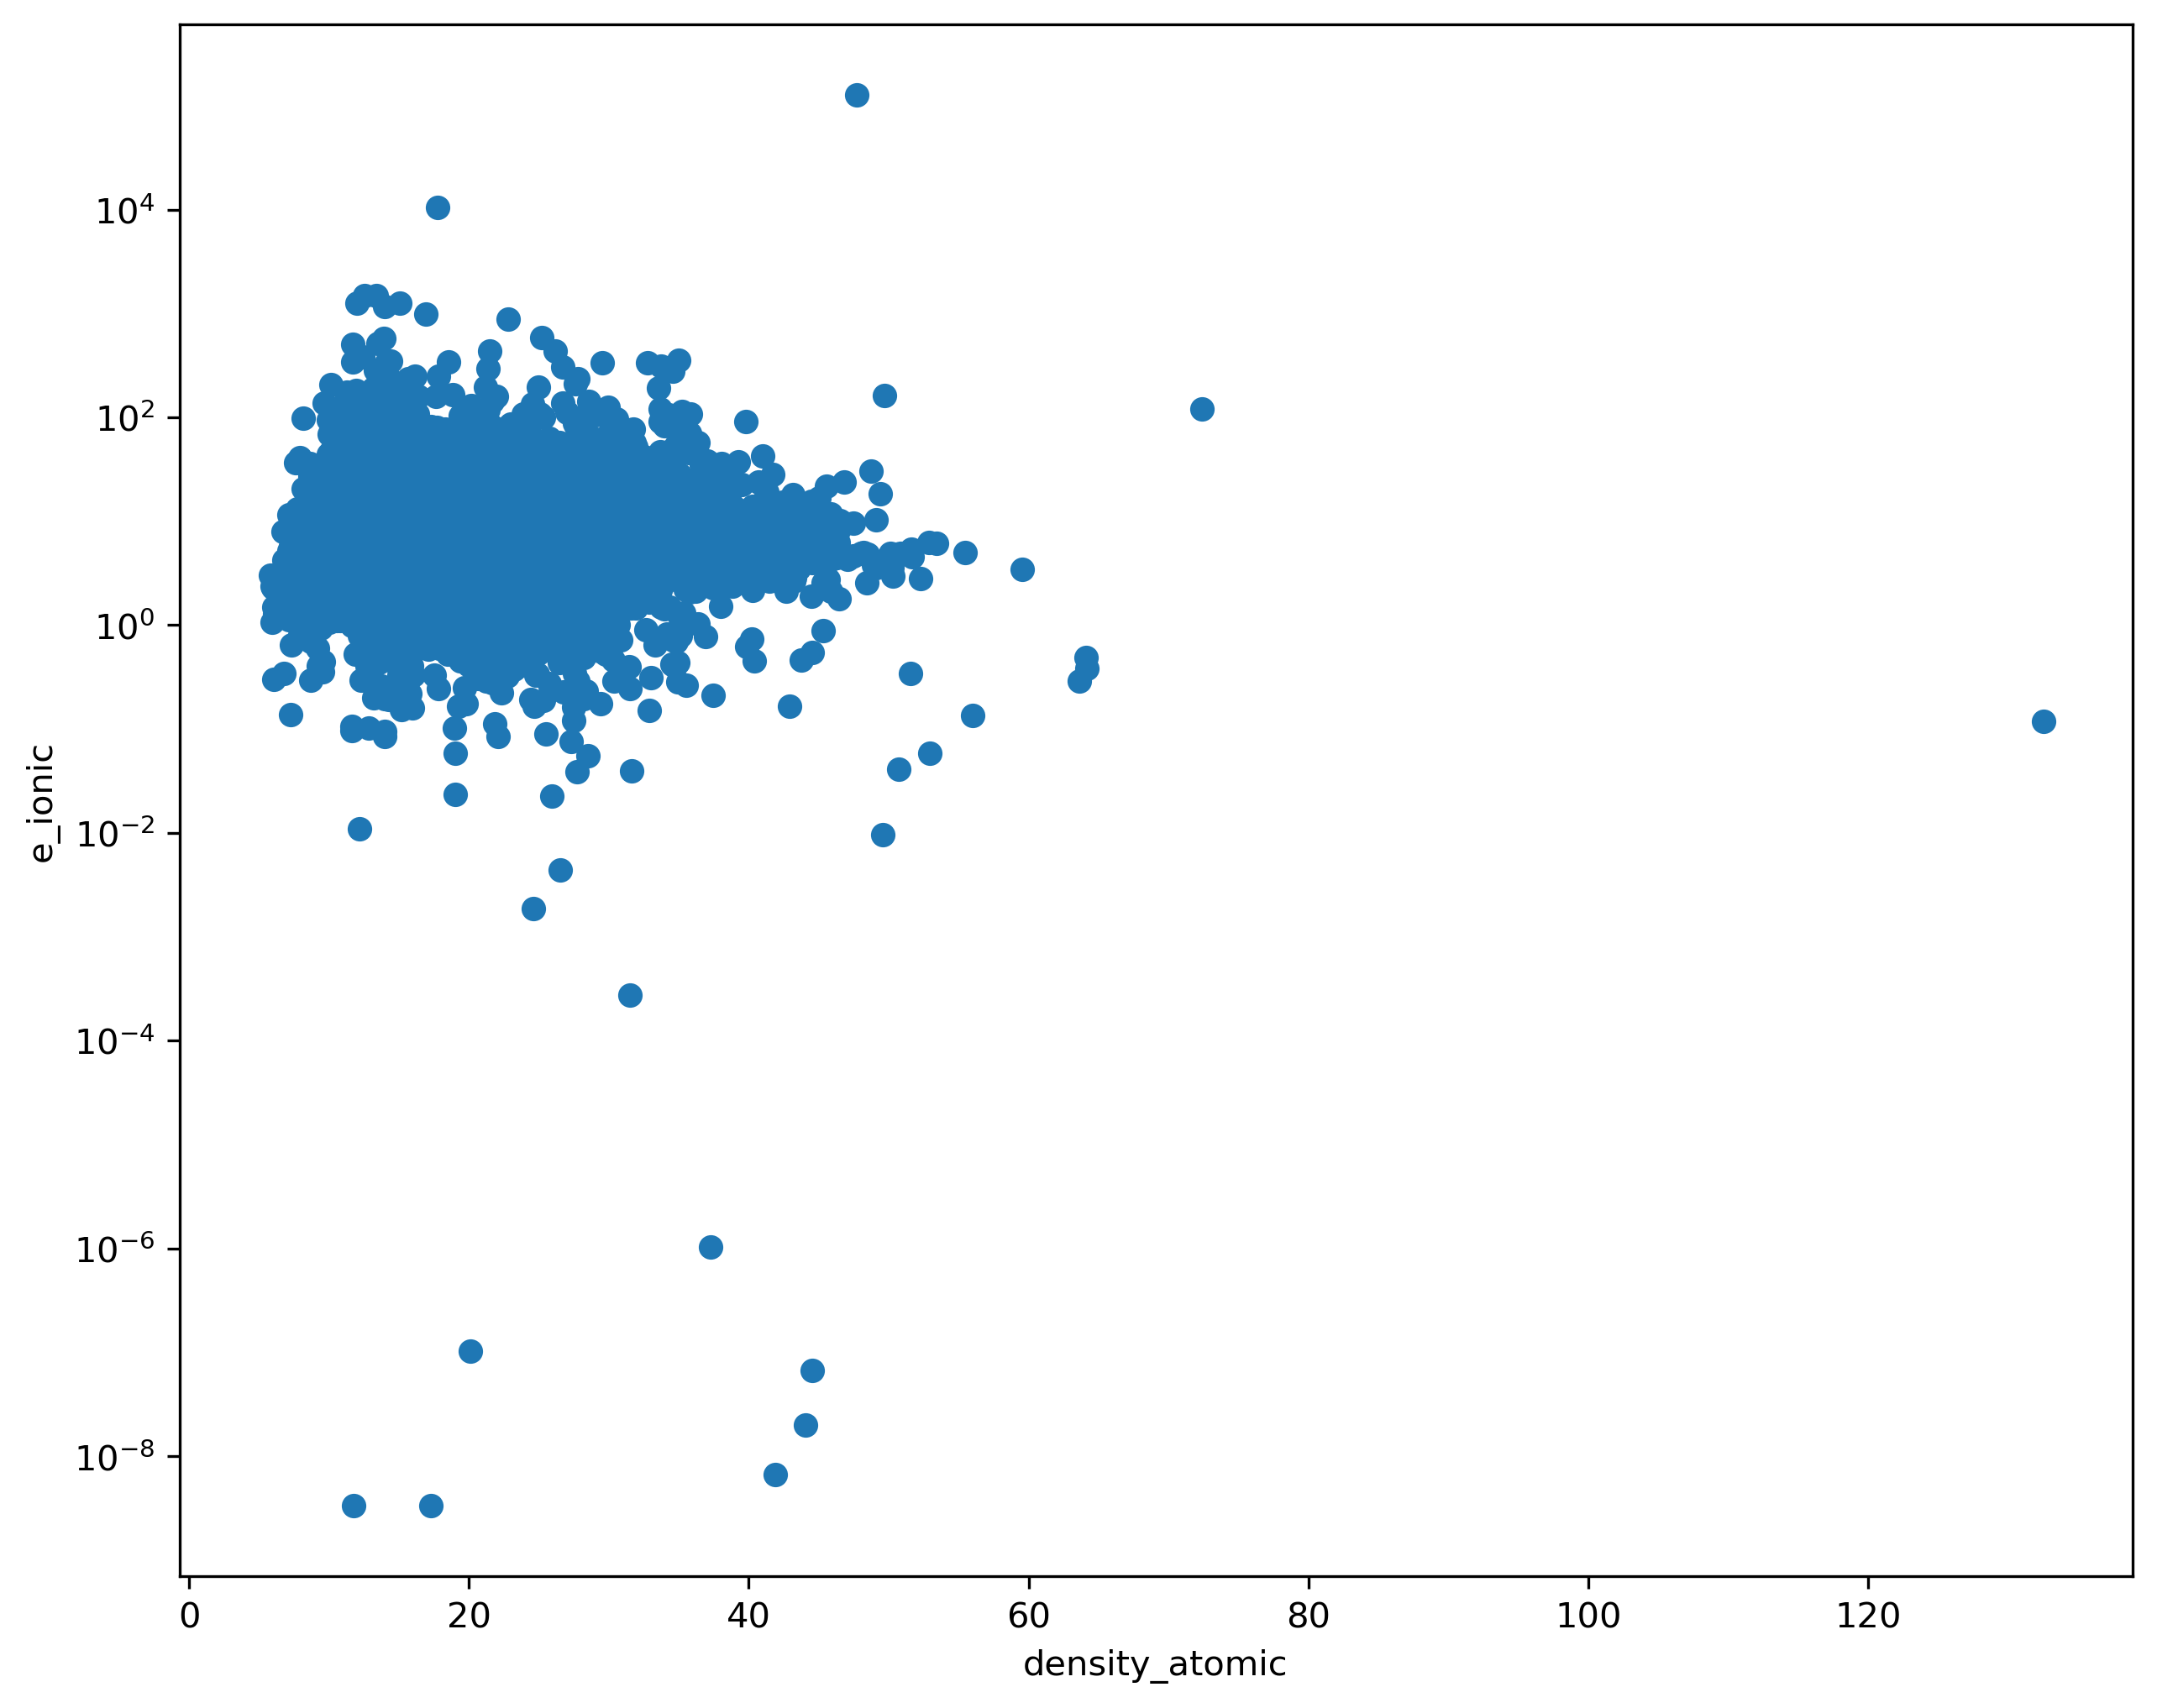

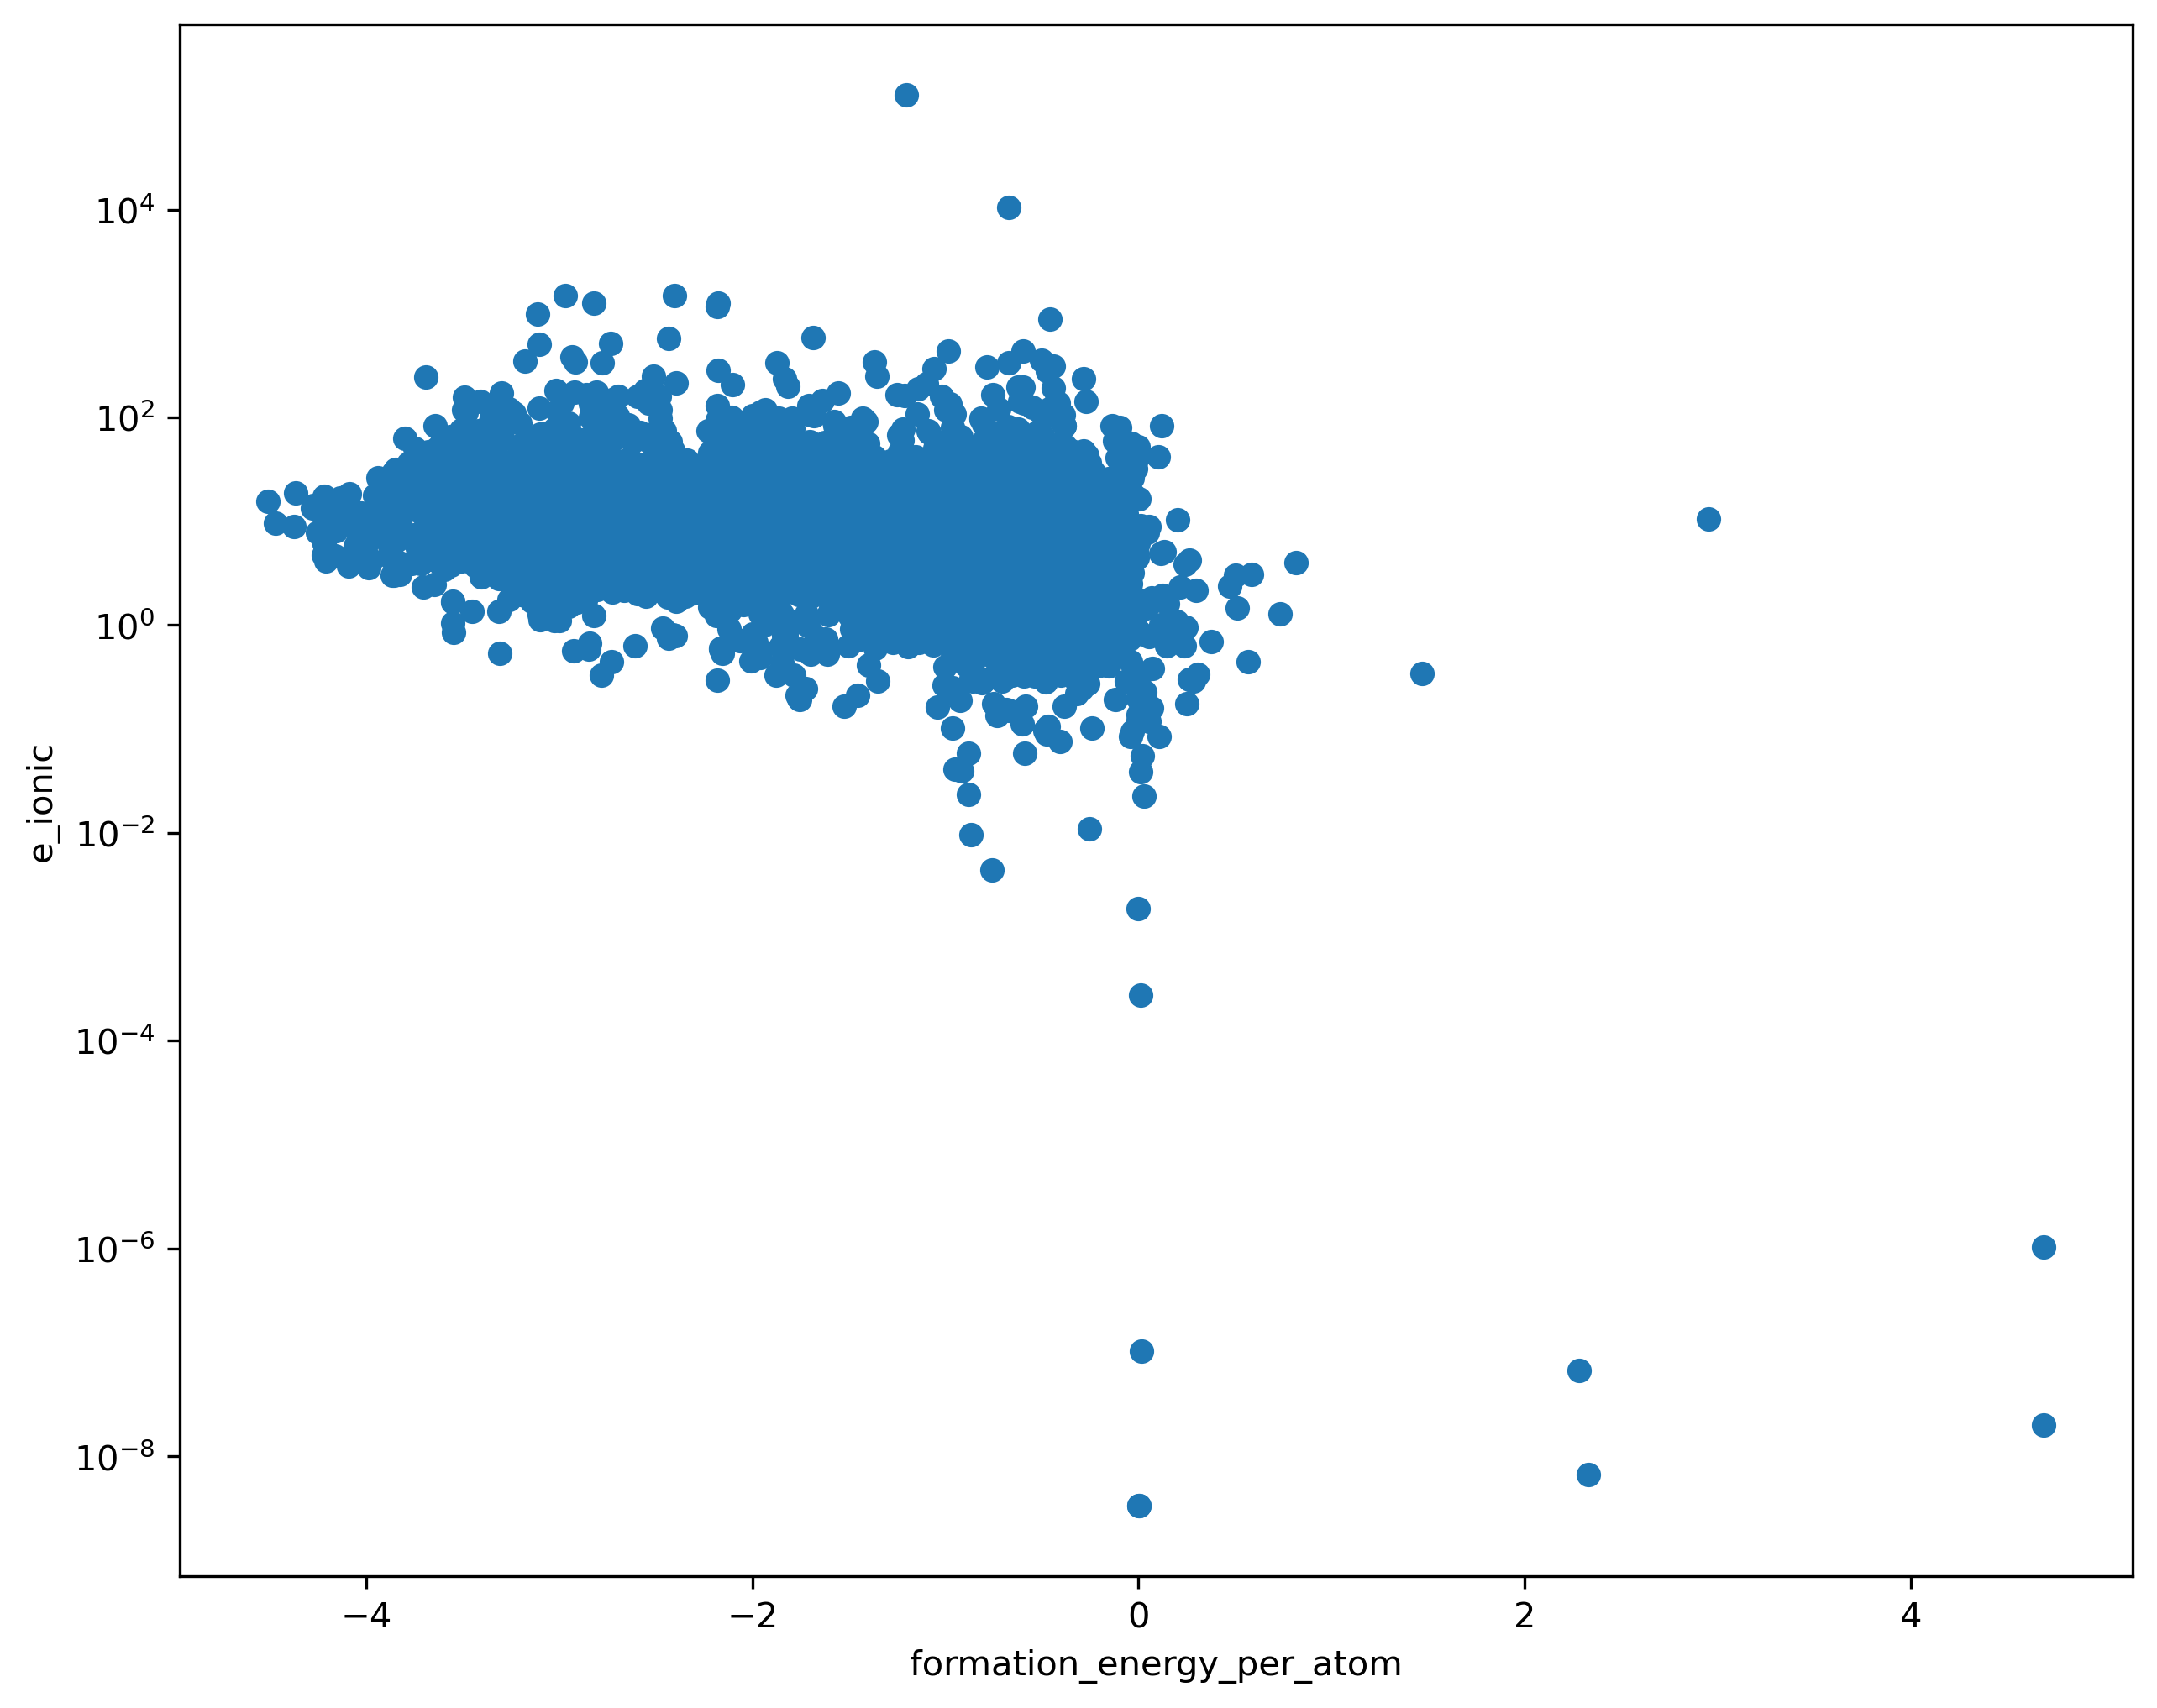

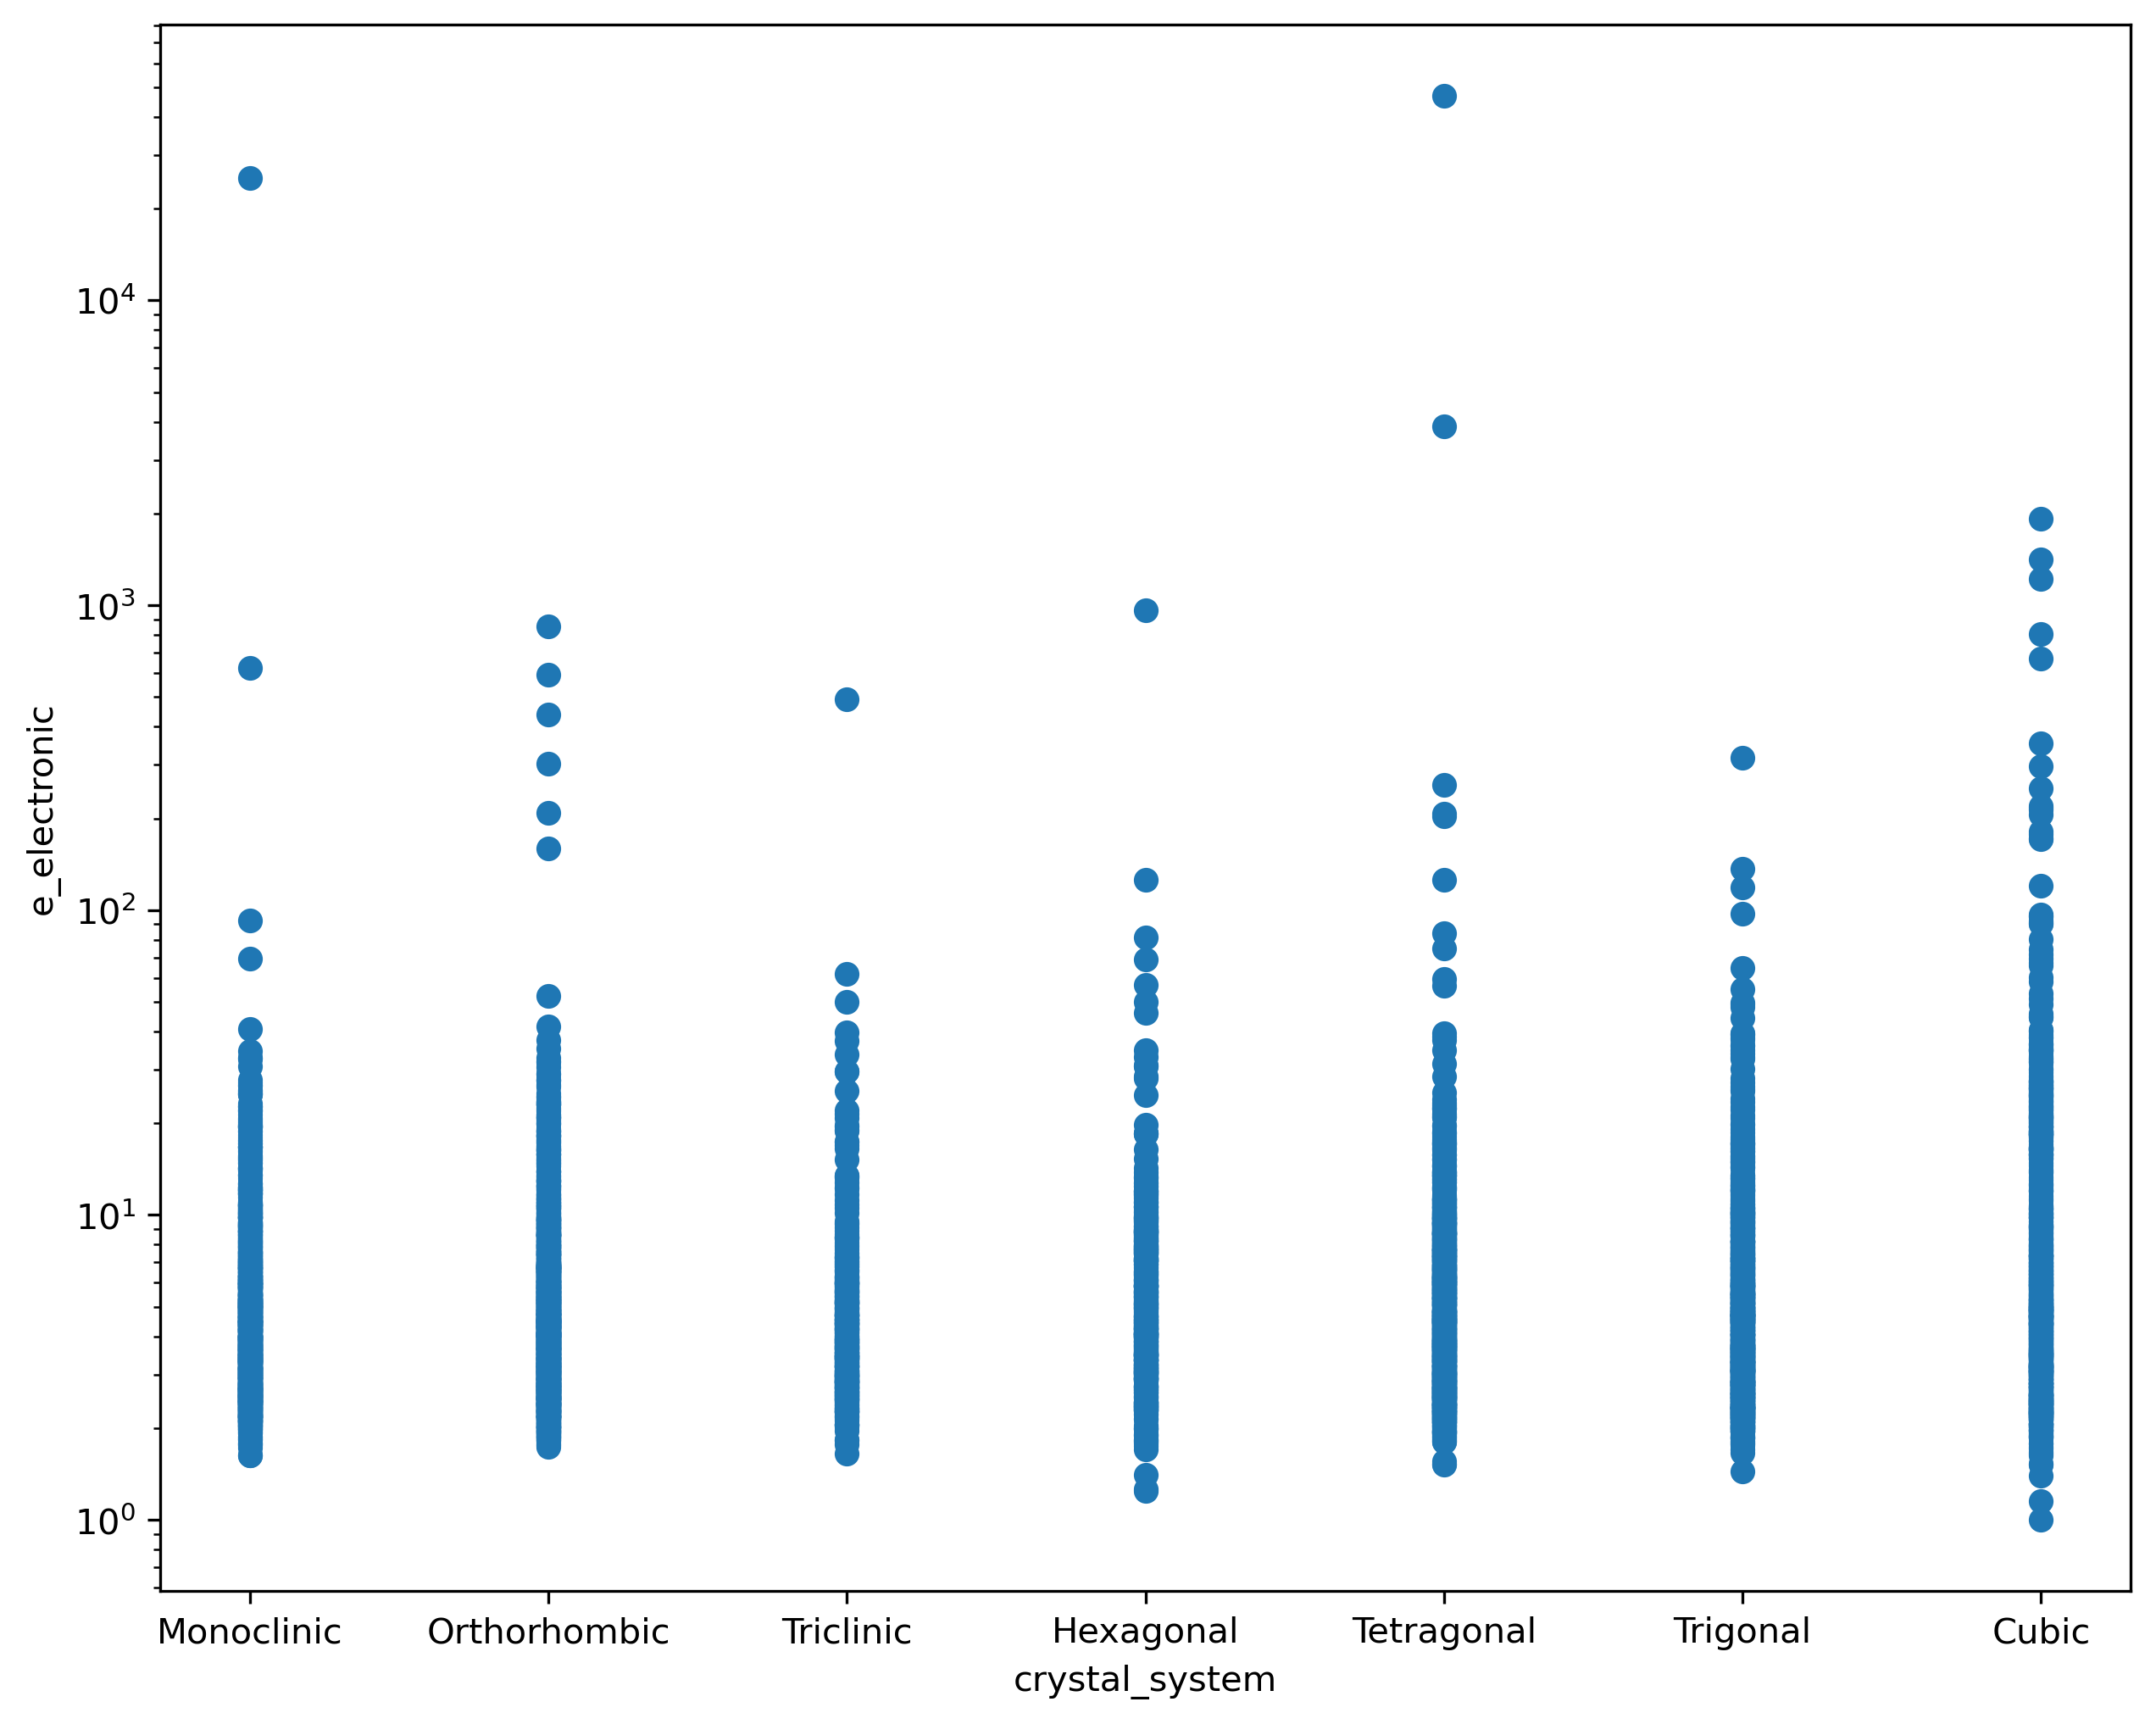

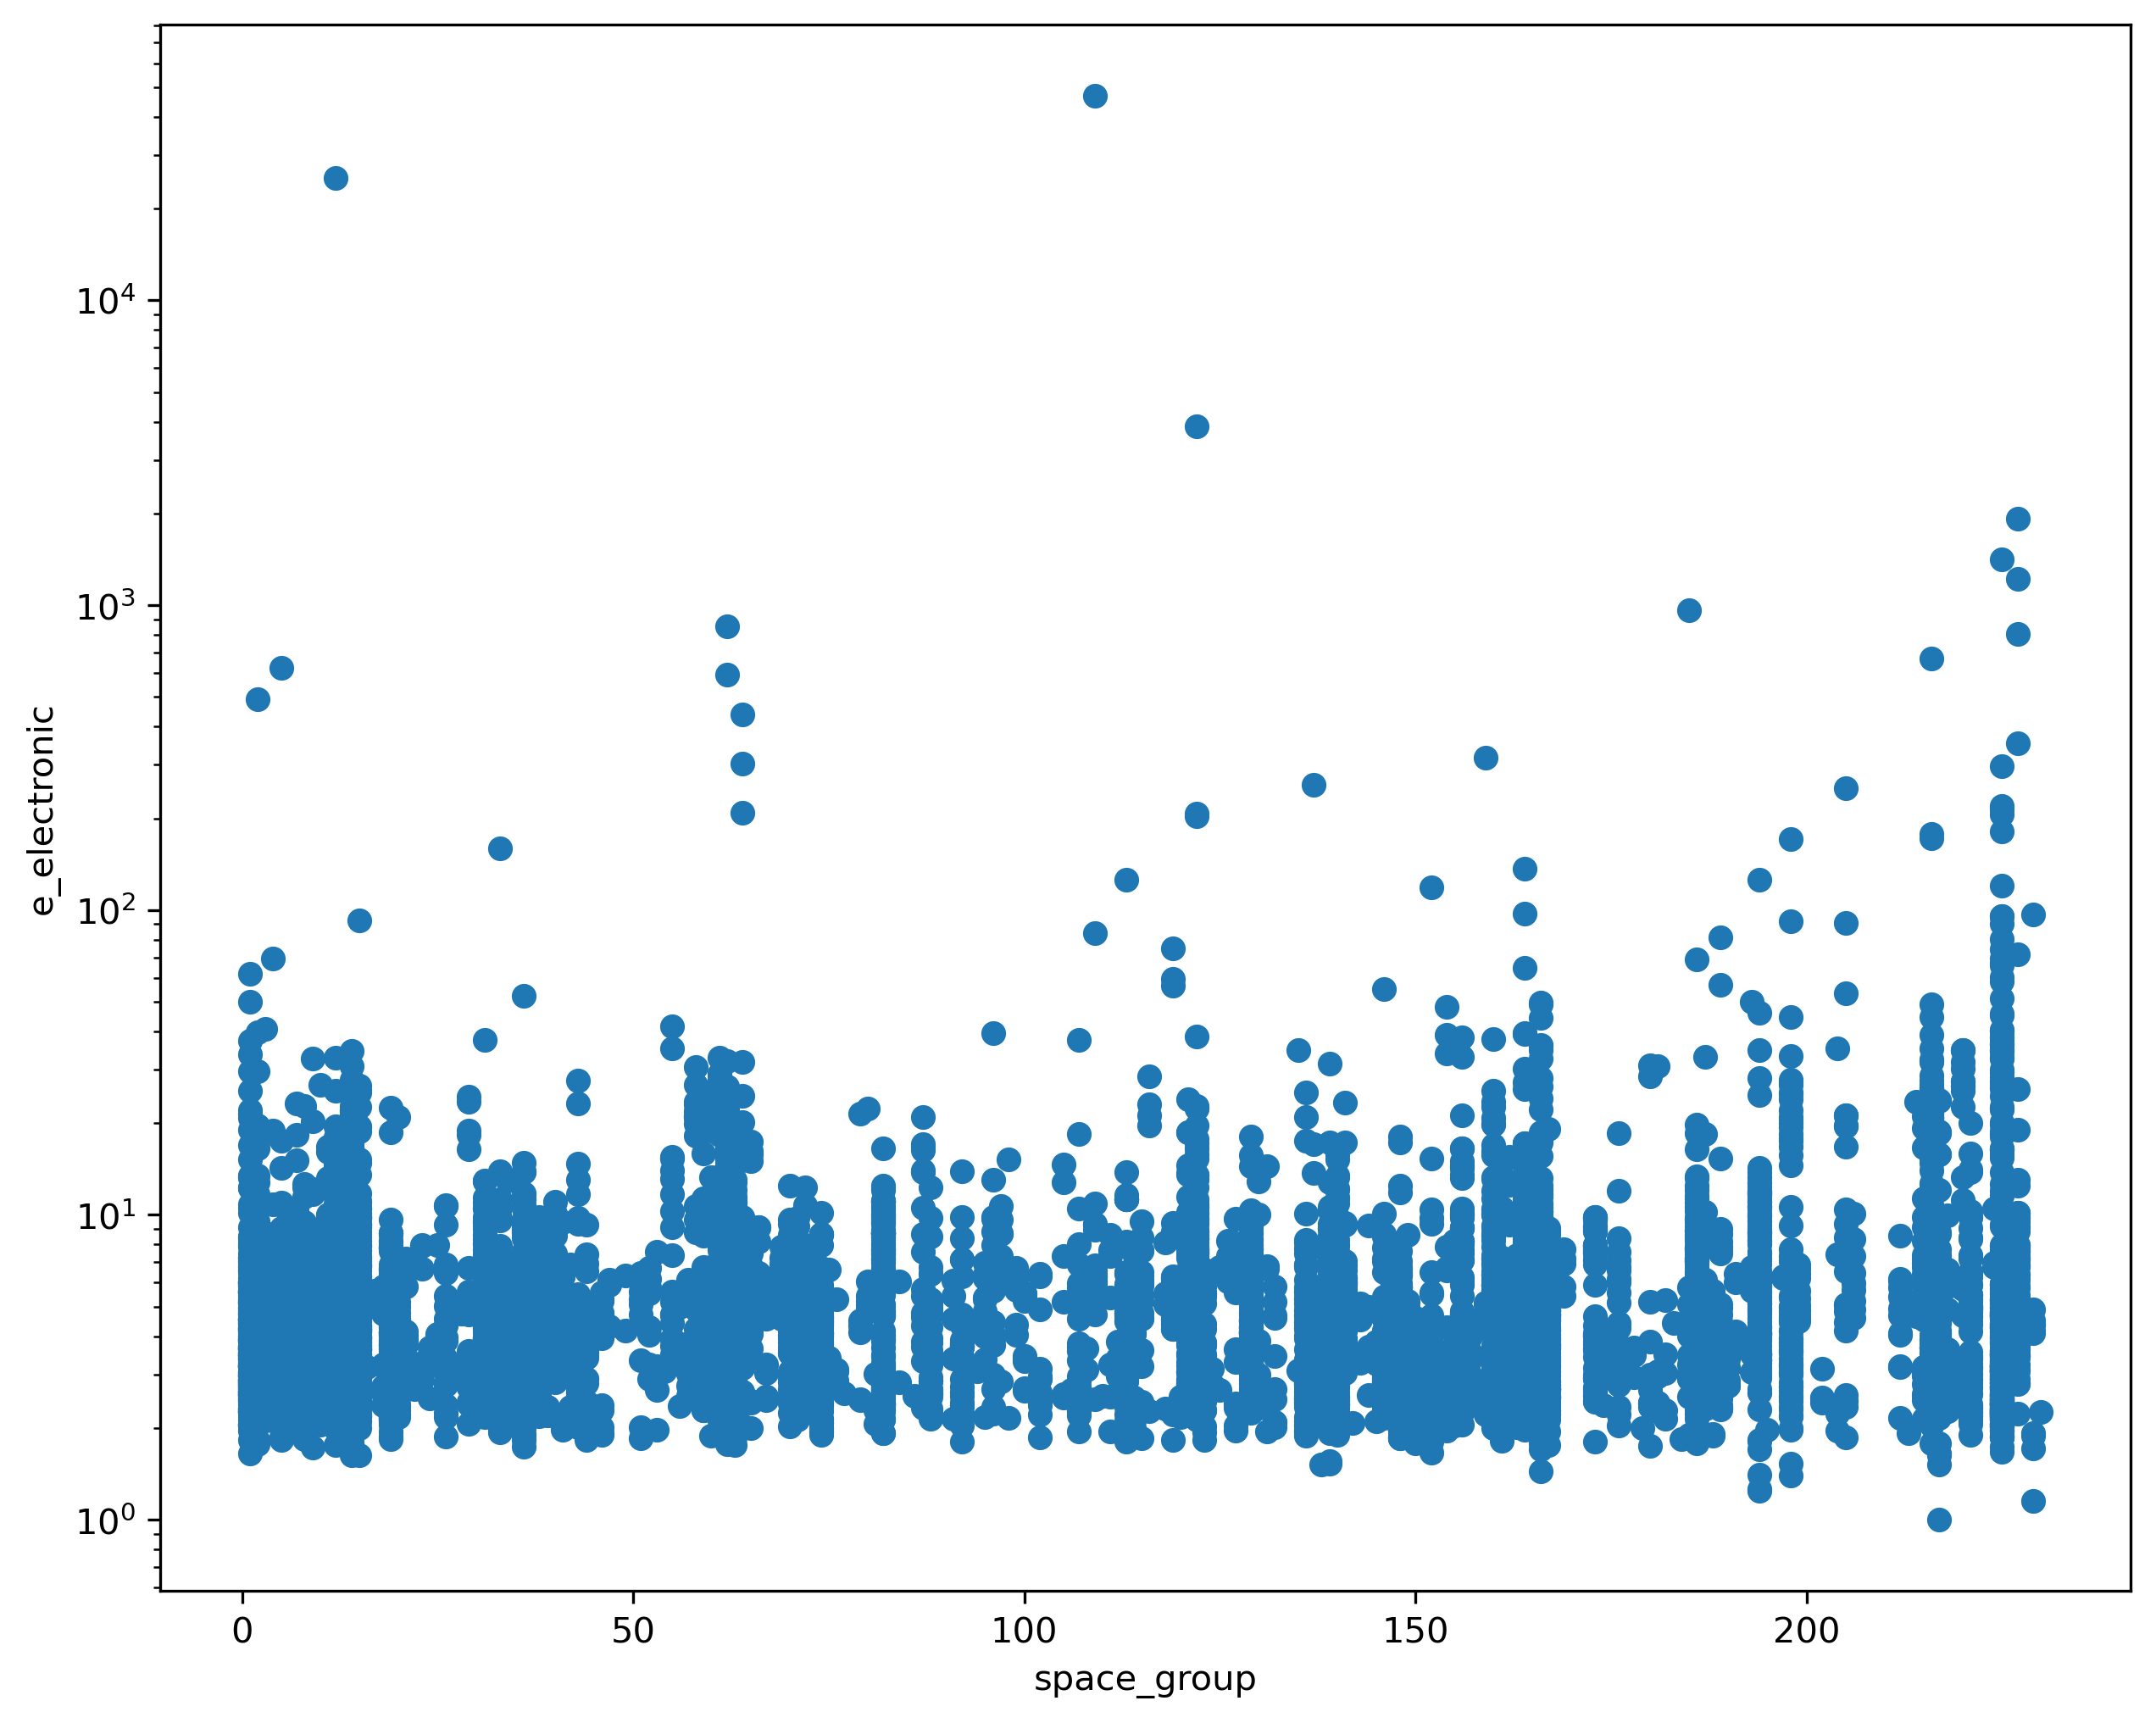

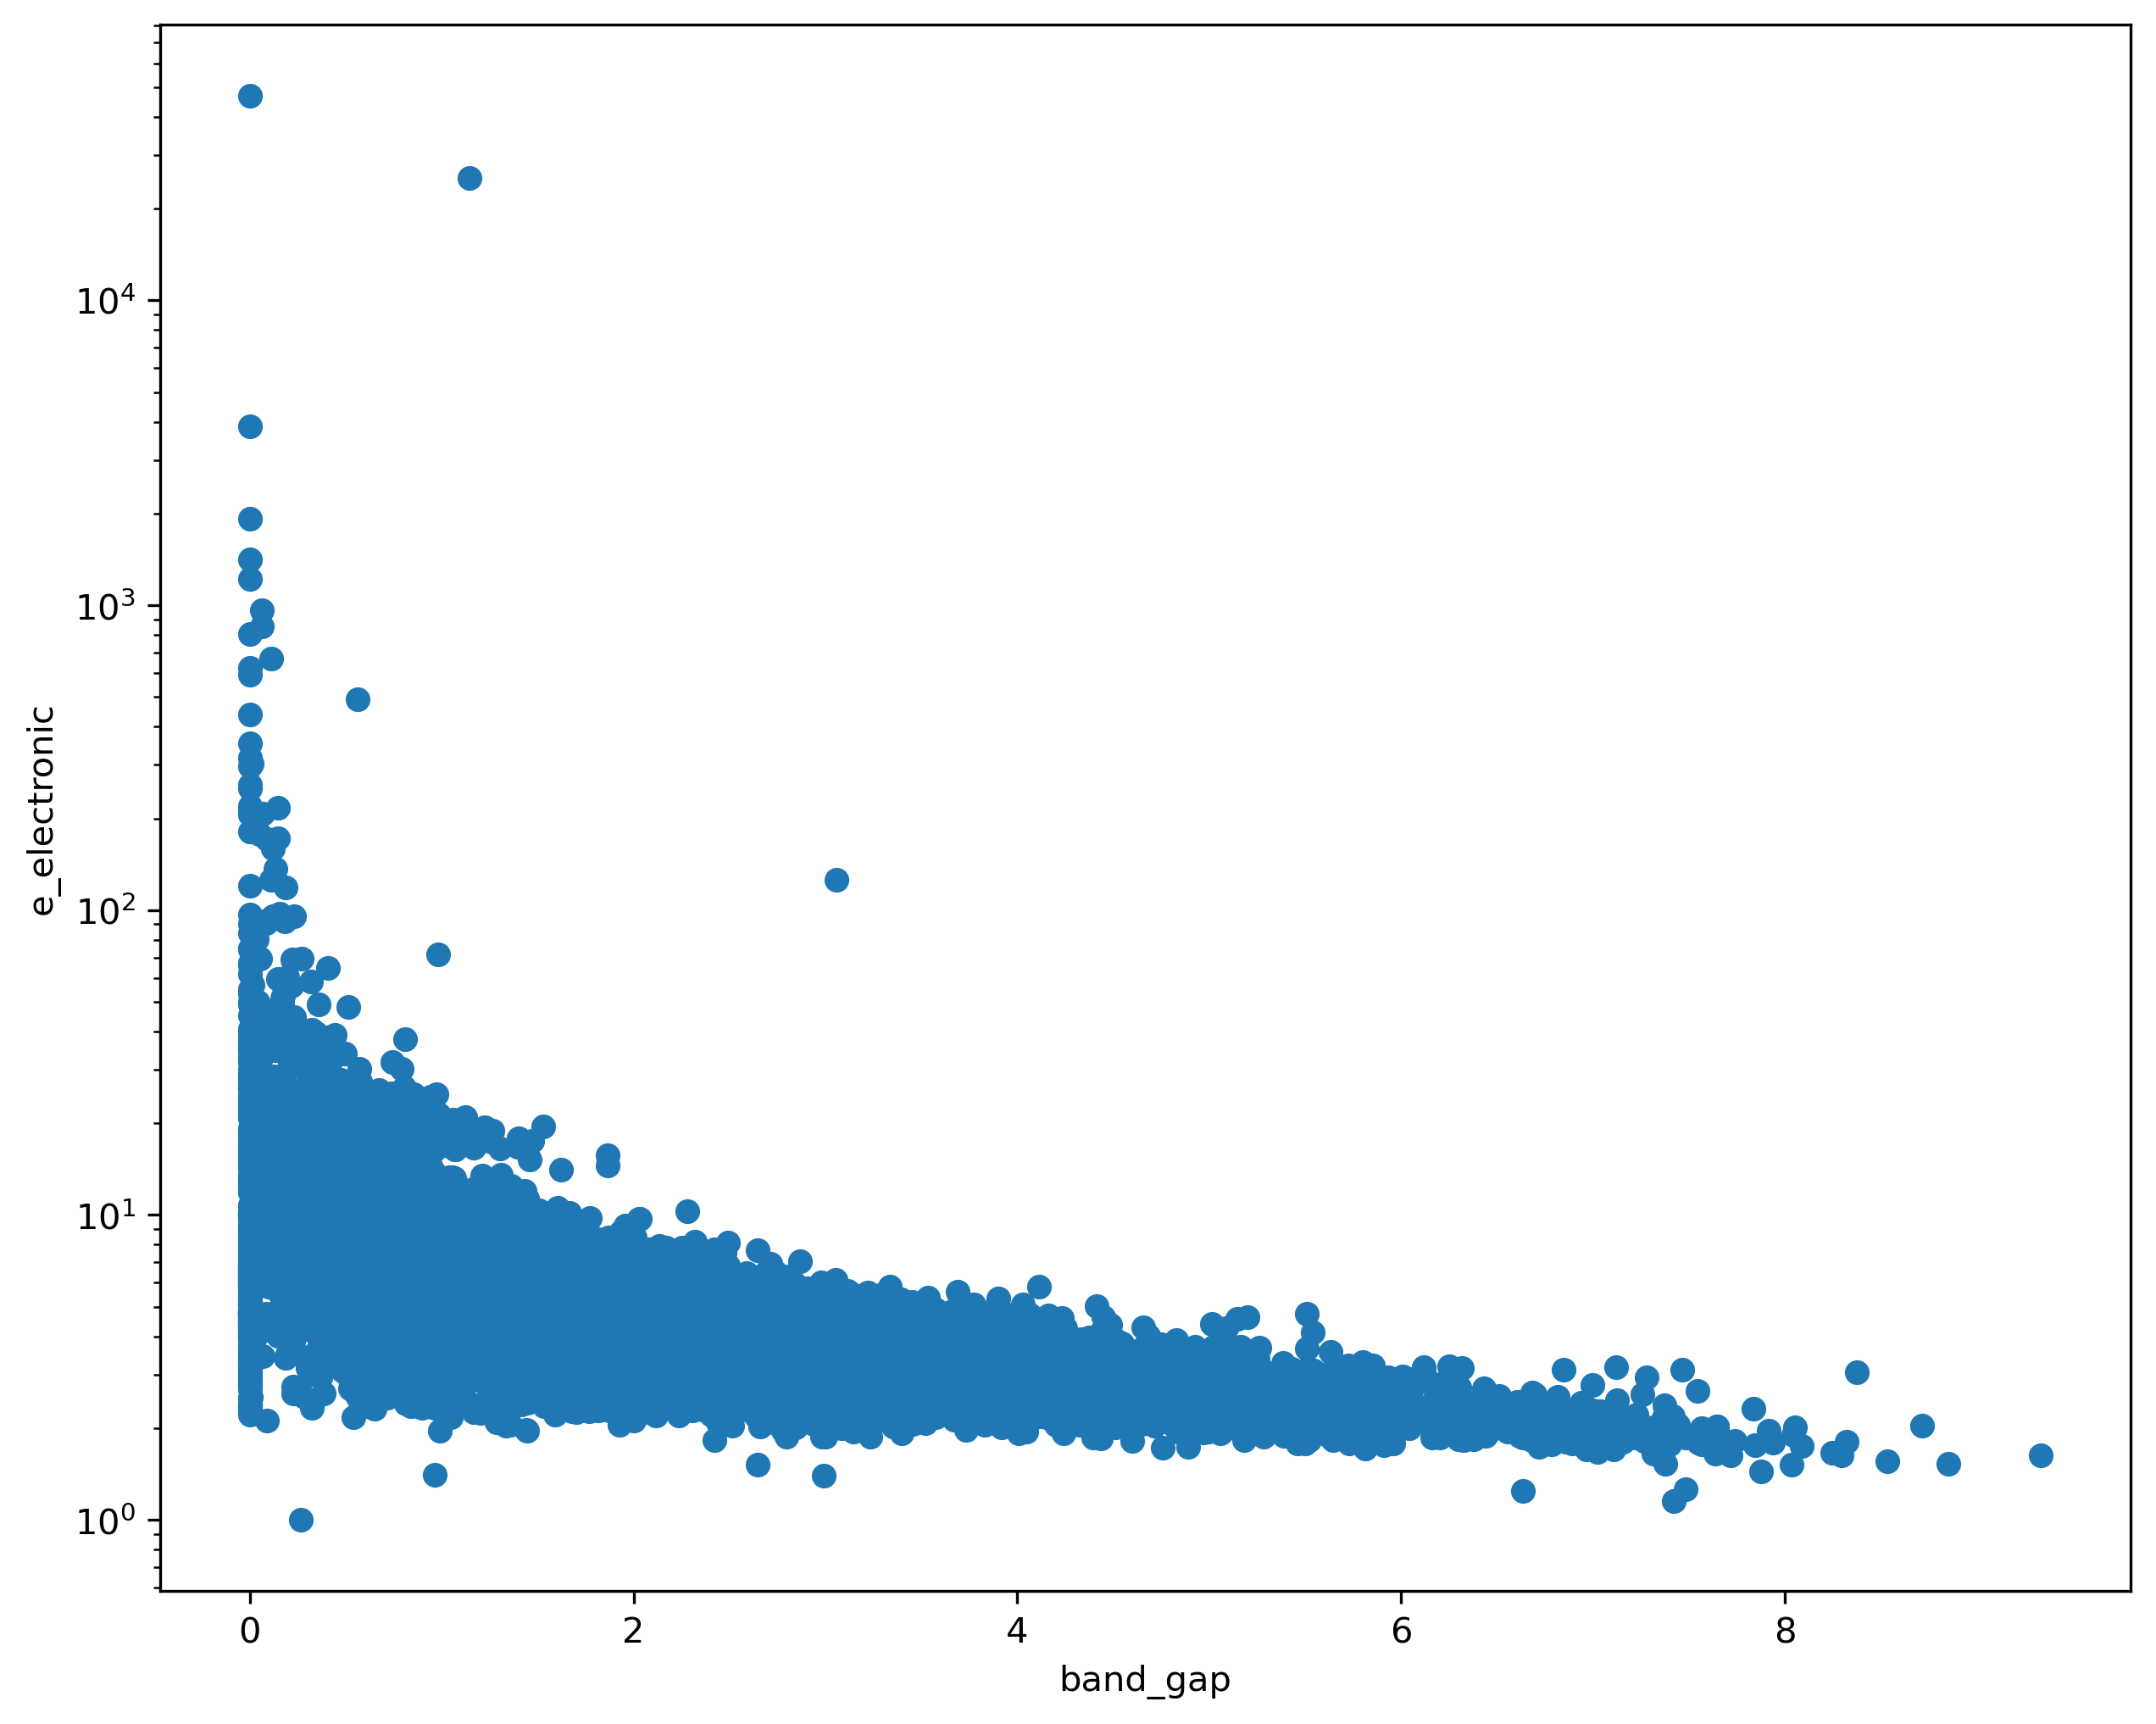

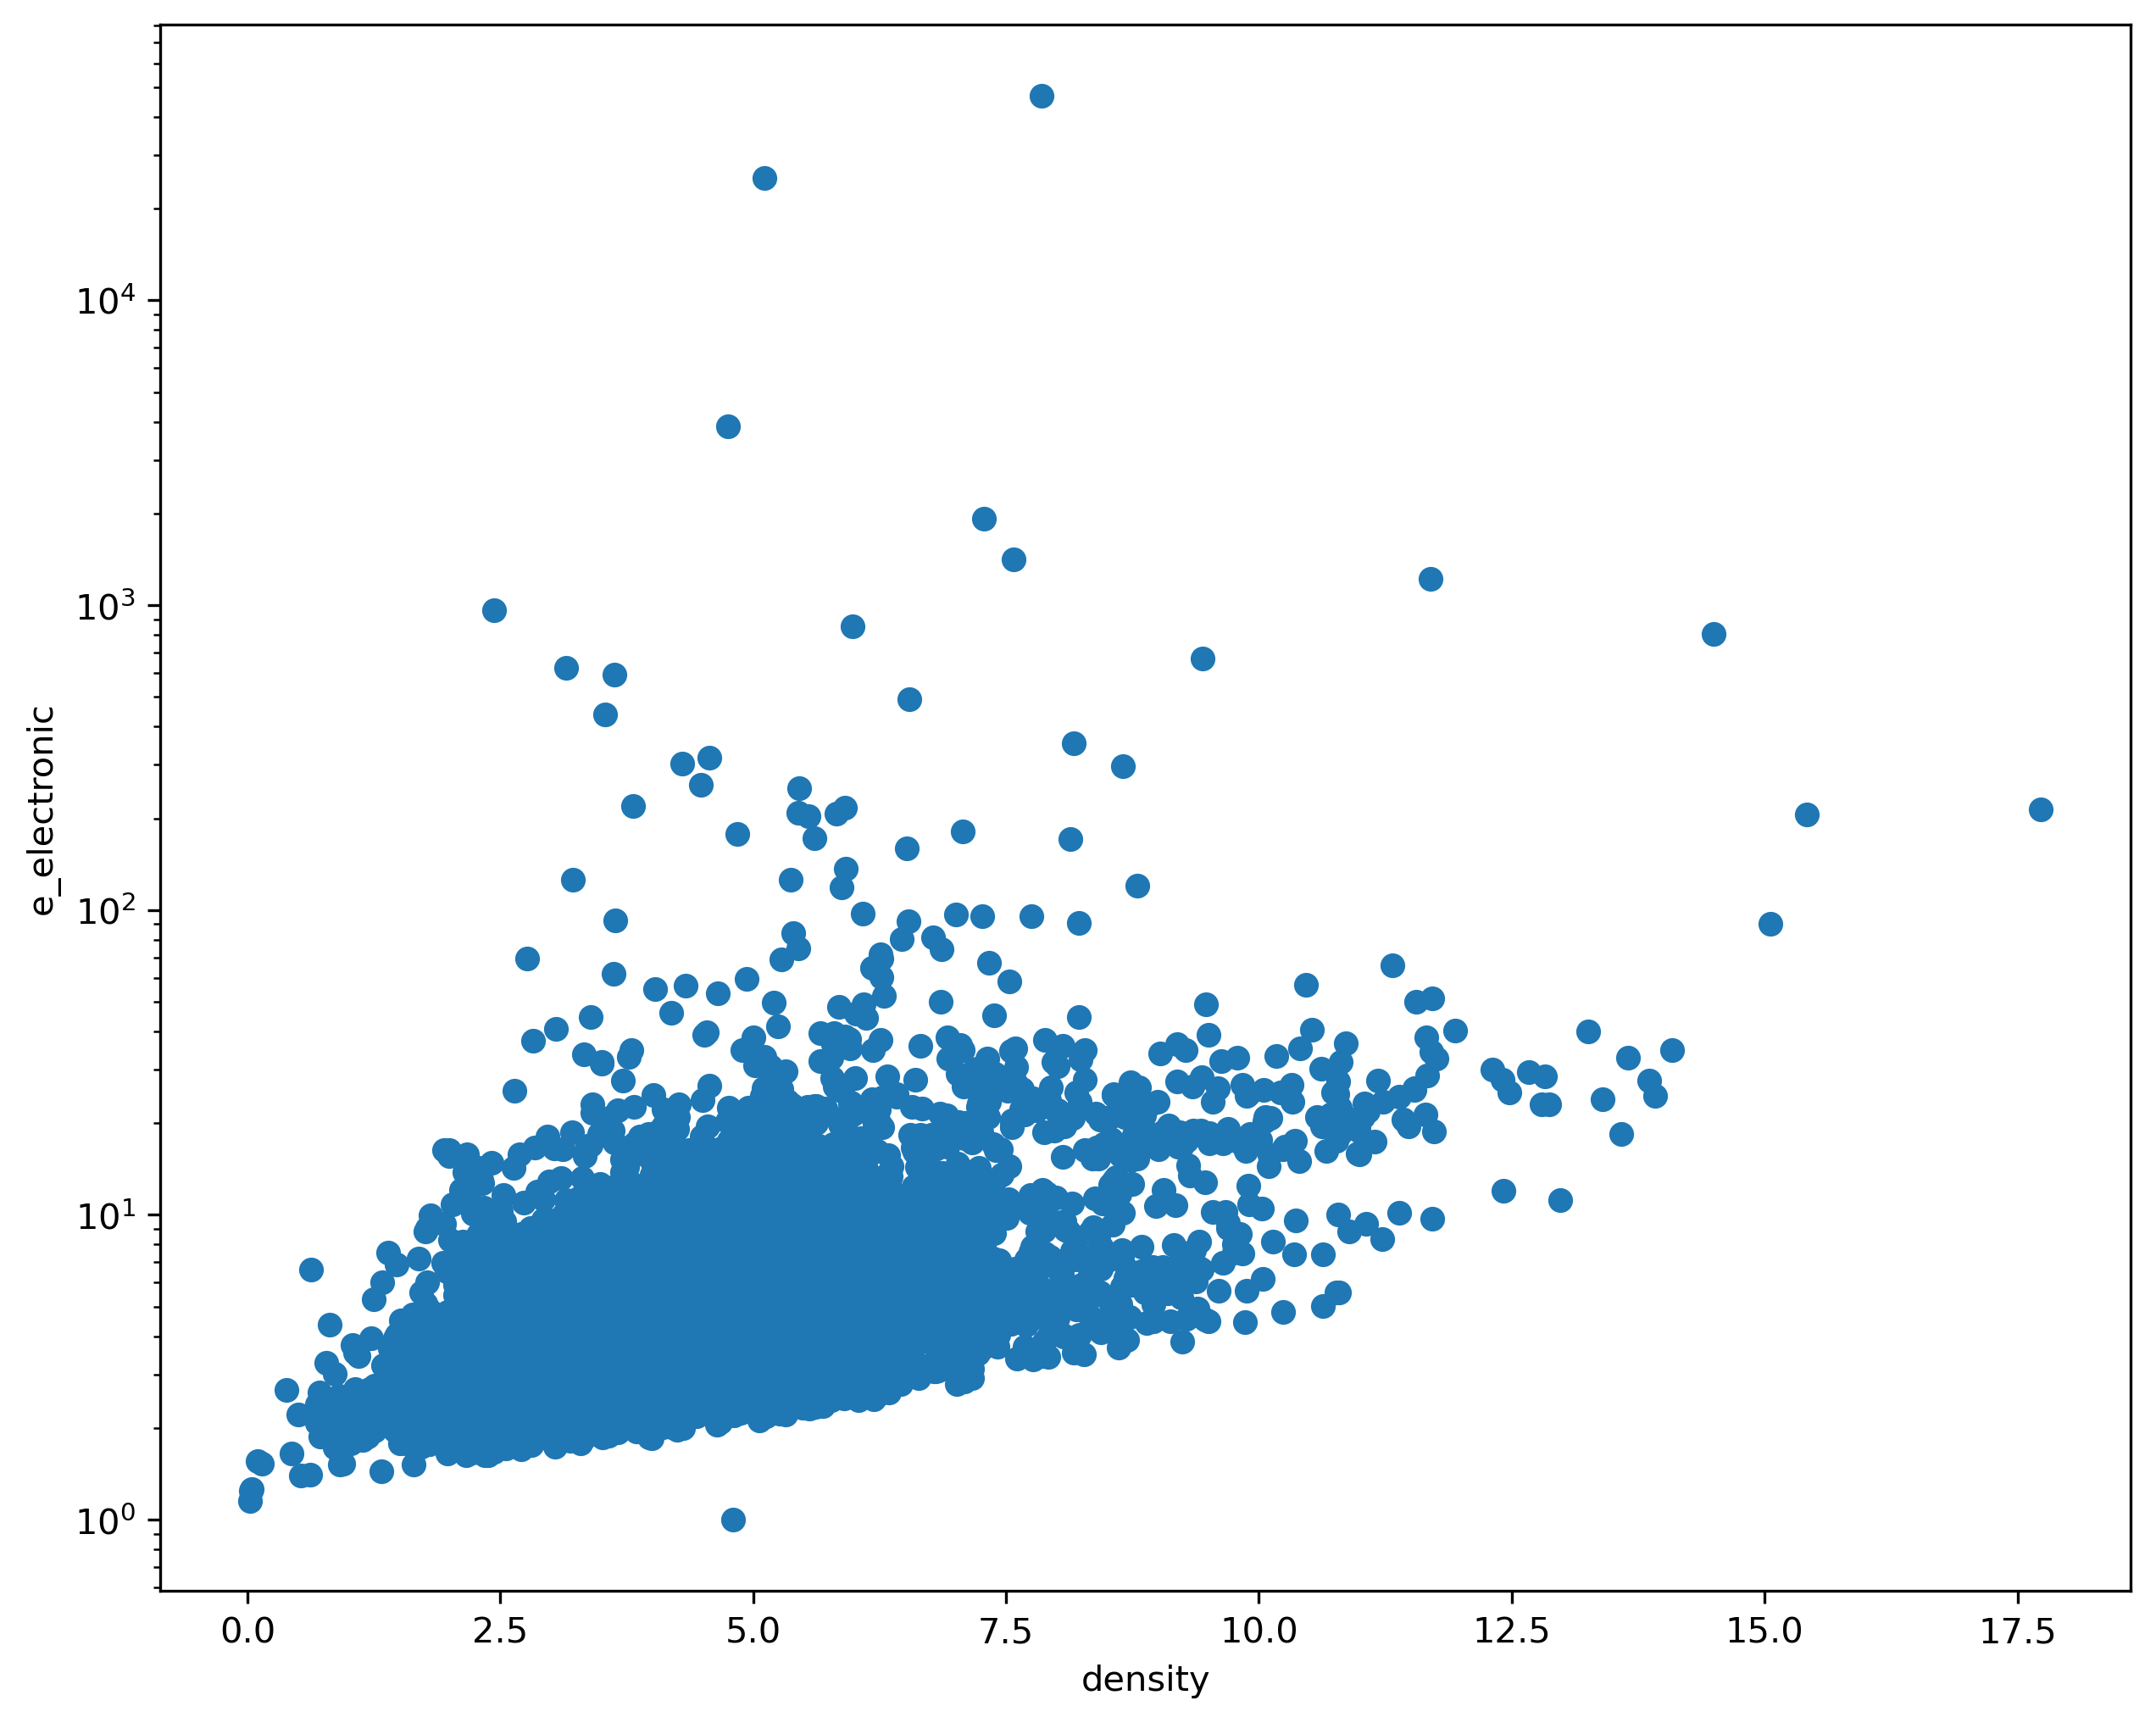

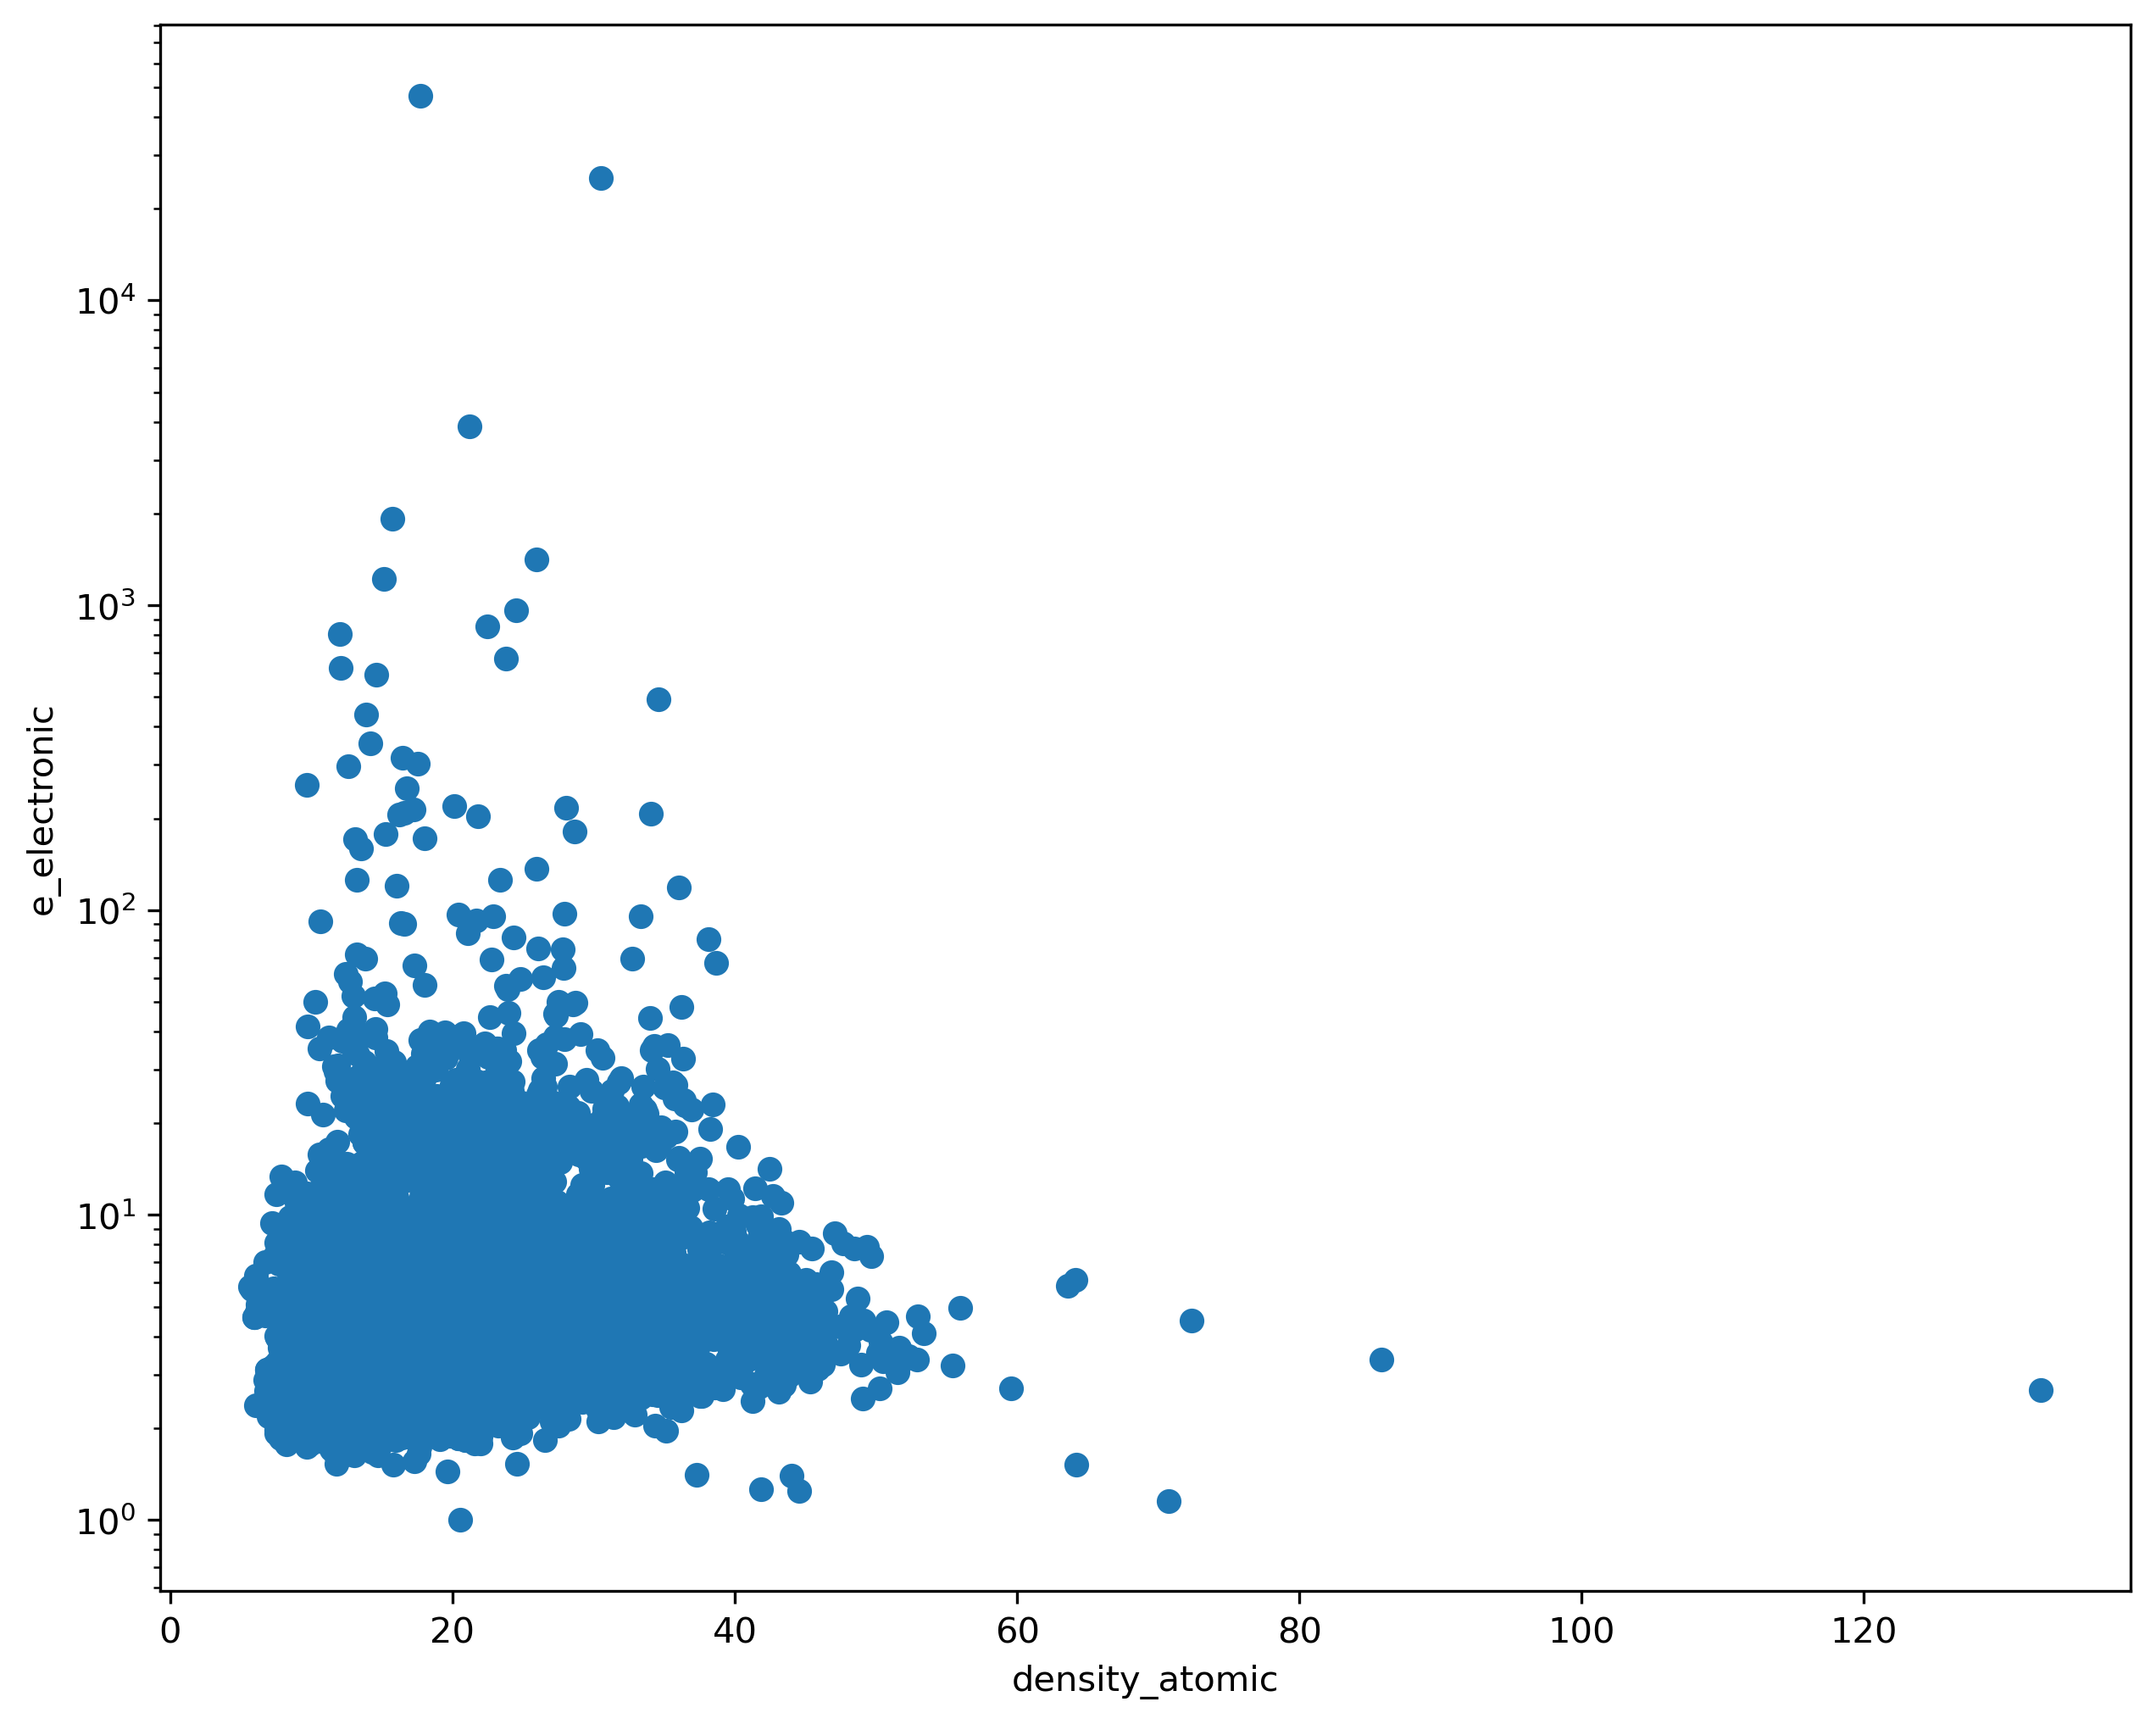

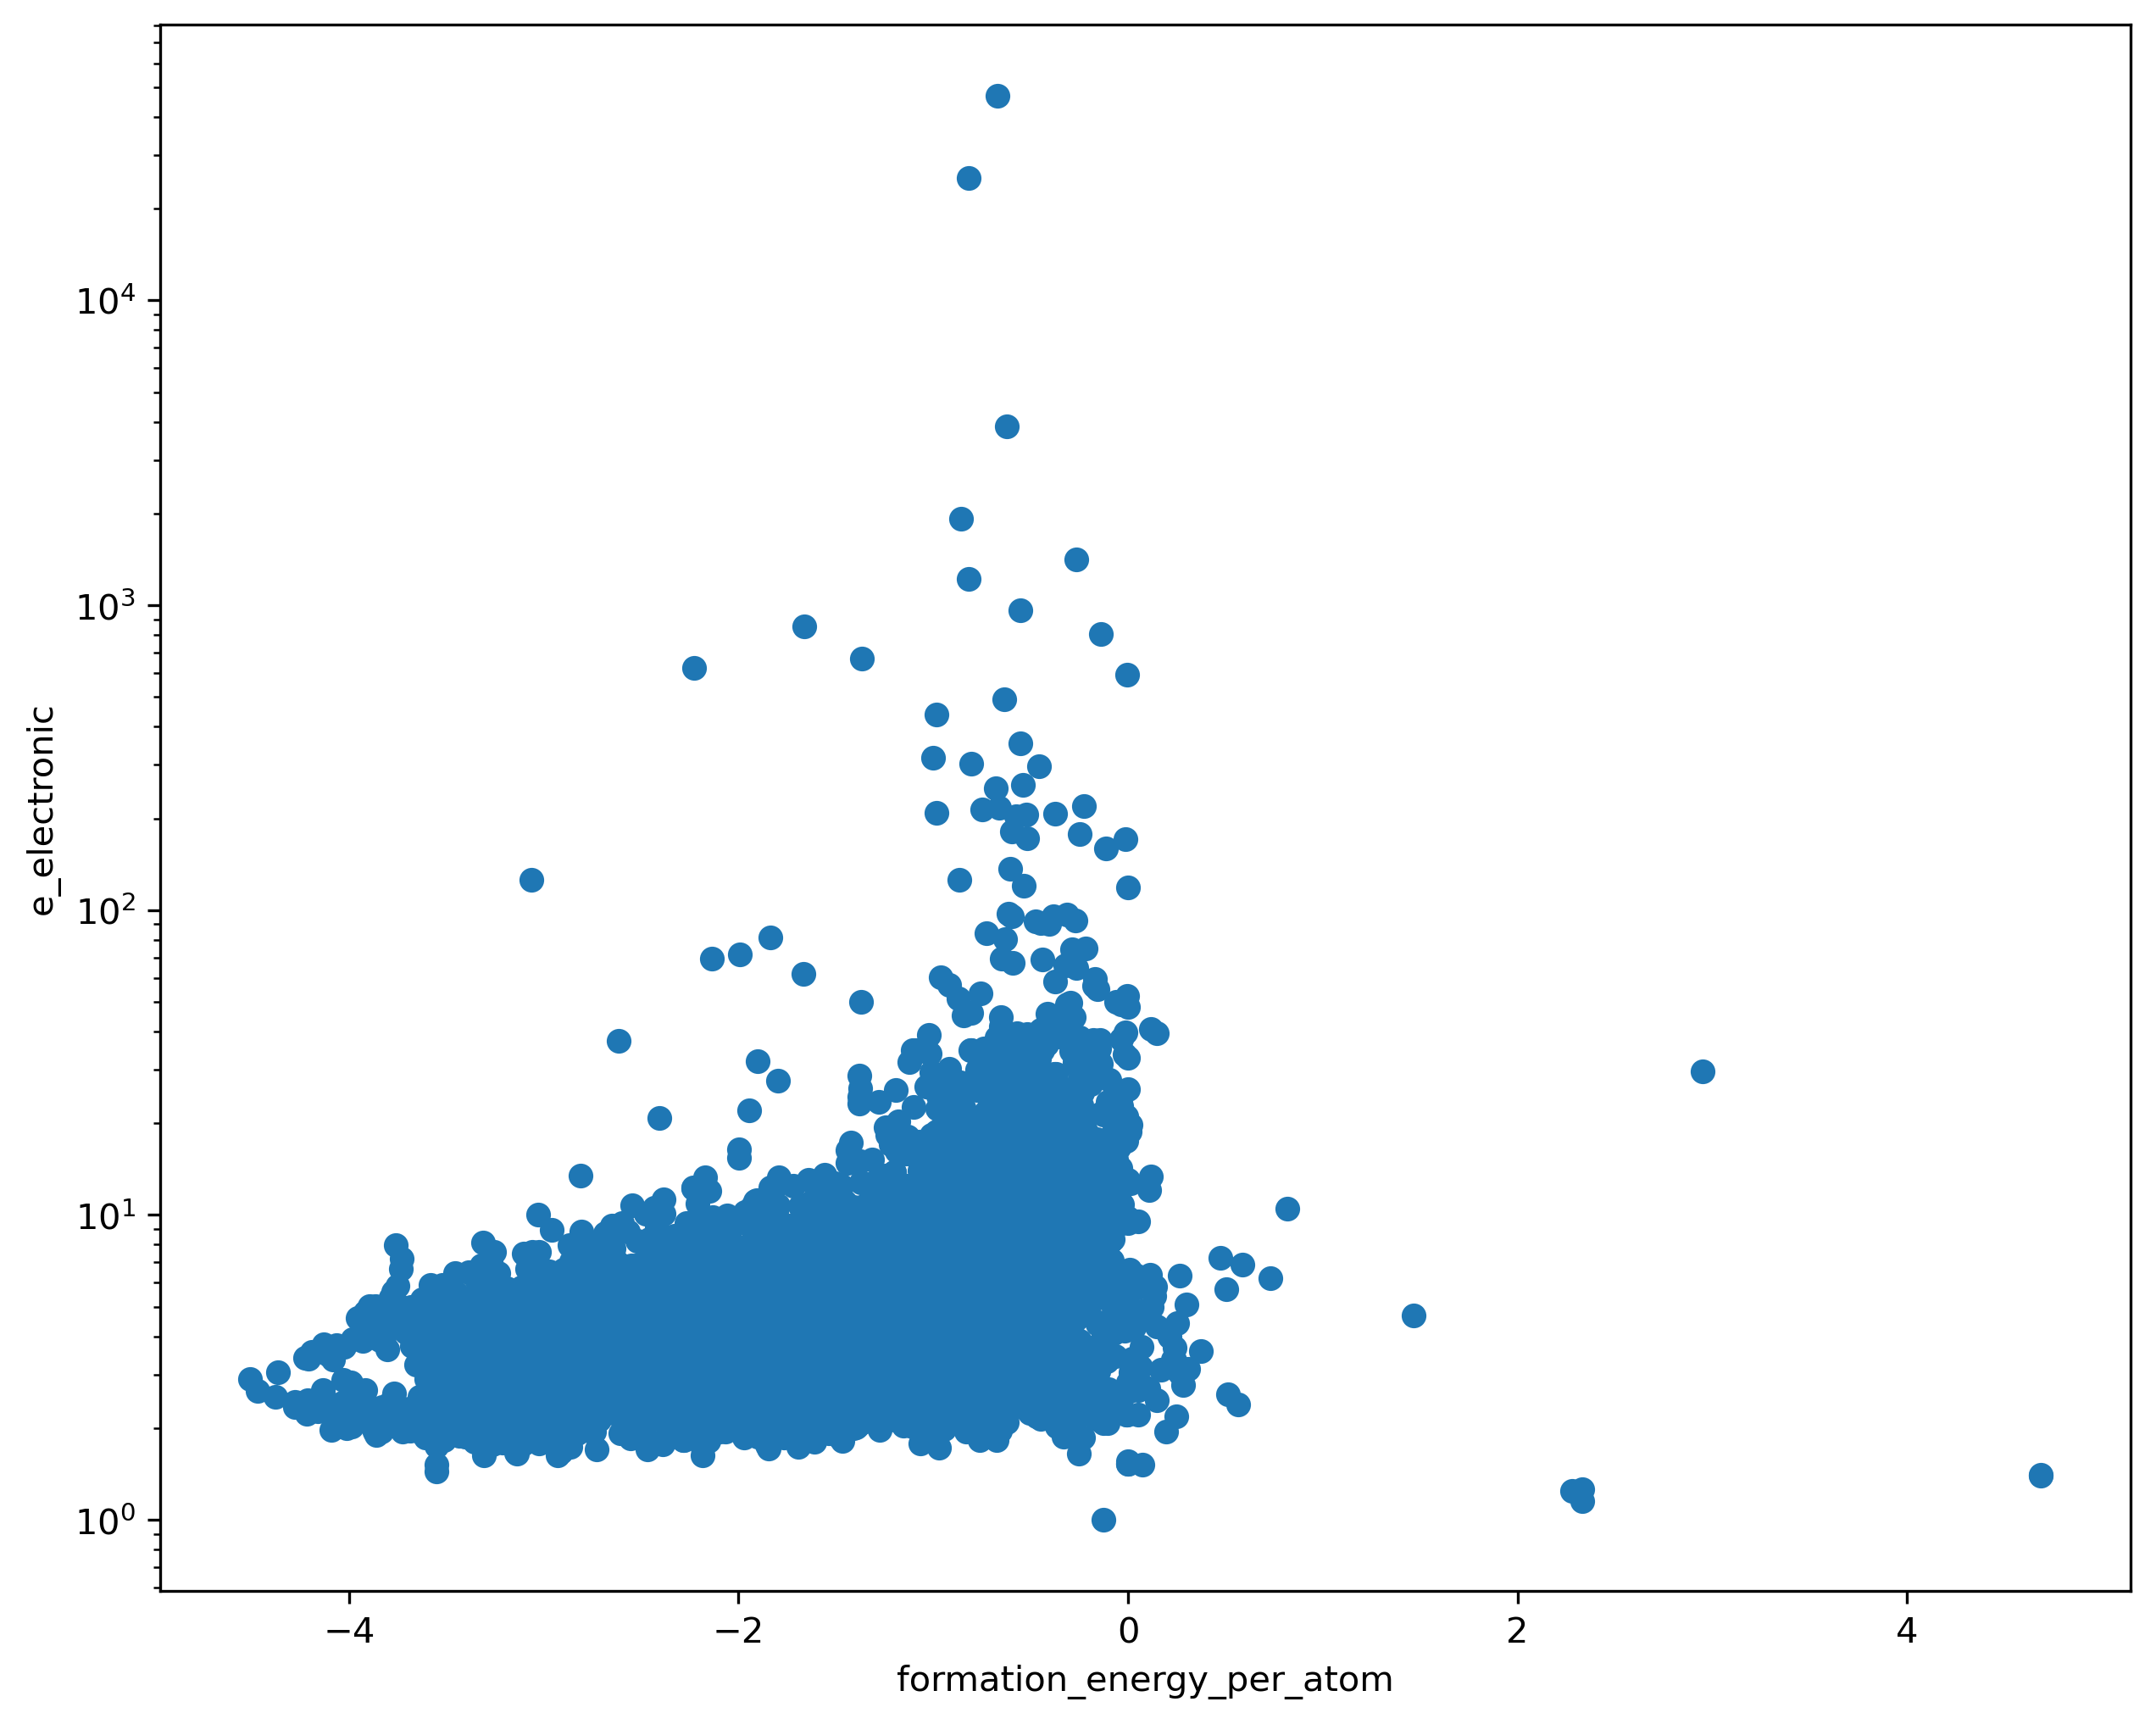

In [20]:
df_scatter_plot()

- 由上可见，e_elec与band_gap关系较大 

### 特征化

In [22]:
# 得到组分

str_comp = StrToComposition(target_col_id='composition')
data_composition_df = str_comp.featurize_dataframe(total_data_df, col_id='formula_pretty')
# 特征化

featurizer = ElementProperty.from_preset('magpie') 	# 从预设数据库中提取特征
data_featurized_df = featurizer.featurize_dataframe(data_composition_df, col_id='composition')

StrToComposition:   0%|          | 0/7277 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/7277 [00:00<?, ?it/s]

In [23]:
# 保存特征化后的dataframe
data_featurized_df.to_csv('data/total_data_featurized.csv', index=False)

In [24]:
# 释放一下内存
del total_data_df, data_composition_df

In [28]:
# 创建仅含所需训练特征的dataframe
columns_name=['material_id',
 'composition',
 'crystal_system',
 'space_group',
 'band_gap',
 'density',
 'density_atomic',
 'formation_energy_per_atom',
 'e_total',
 'e_ionic',
 'e_electronic',
 'MagpieData minimum Number',
 'MagpieData maximum Number',
 'MagpieData range Number',
 'MagpieData mean Number',
 'MagpieData minimum CovalentRadius',
 'MagpieData maximum CovalentRadius',
 'MagpieData range CovalentRadius',
 'MagpieData mean CovalentRadius',
 'MagpieData minimum Electronegativity',
 'MagpieData maximum Electronegativity',
 'MagpieData range Electronegativity',
 'MagpieData mean Electronegativity']

In [29]:
data_featurized_df.head()

,material_id,formula_pretty,crystal_system,space_group,band_gap,density,density_atomic,formation_energy_per_atom,e_total,e_ionic,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,mp-28967,Ba(PdS2)2,Monoclinic,11,0.7792,5.022717,22.595815,-1.124079,17.048334,7.118969,...,0.000000,0.000000,0.000000,0.0,70.0,229.0,159.0,137.000000,76.571429,70.0
1,mp-766094,NbO2F,Orthorhombic,19,2.8980,3.764366,15.869706,-3.099174,17.572010,13.469477,...,0.000000,0.000000,0.000000,0.0,12.0,229.0,217.0,67.000000,81.000000,12.0
2,mp-36577,Sr(AsS2)2,Triclinic,1,1.7212,3.094976,28.031499,-0.766100,18.488667,12.443616,...,0.000000,0.000000,0.000000,0.0,70.0,225.0,155.0,119.571429,56.653061,70.0
3,mp-1102092,NaFe(SO4)2,Monoclinic,12,2.0944,2.901260,12.923684,-1.948264,9.596025,6.499905,...,2.110663,0.175889,0.322462,0.0,12.0,229.0,217.0,57.833333,61.111111,12.0
4,mp-720391,BH4NF4,Orthorhombic,62,7.4812,1.860992,9.355010,-1.970766,6.216546,4.350314,...,0.000000,0.000000,0.000000,0.0,15.0,194.0,179.0,119.600000,83.680000,15.0


In [30]:
data_training_df = data_featurized_df[columns_name]
data_training_df.head()

,material_id,composition,crystal_system,space_group,band_gap,density,density_atomic,formation_energy_per_atom,e_total,e_ionic,...,MagpieData range Number,MagpieData mean Number,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity
0,mp-28967,"(Ba, Pd, S)",Monoclinic,11,0.7792,5.022717,22.595815,-1.124079,17.048334,7.118969,...,40.0,30.285714,105.0,215.0,110.0,130.428571,0.89,2.58,1.69,2.230000
1,mp-766094,"(Nb, O, F)",Orthorhombic,19,2.8980,3.764366,15.869706,-3.099174,17.572010,13.469477,...,33.0,16.500000,57.0,164.0,107.0,88.250000,1.60,3.98,2.38,3.115000
2,mp-36577,"(Sr, As, S)",Triclinic,1,1.7212,3.094976,28.031499,-0.766100,18.488667,12.443616,...,22.0,24.000000,105.0,195.0,90.0,121.857143,0.95,2.58,1.63,2.232857
3,mp-1102092,"(Na, Fe, S, O)",Monoclinic,12,2.0944,2.901260,12.923684,-1.948264,9.596025,6.499905,...,18.0,11.083333,66.0,166.0,100.0,86.333333,0.93,3.44,2.51,2.953333
4,mp-720391,"(B, H, N, F)",Orthorhombic,62,7.4812,1.860992,9.355010,-1.970766,6.216546,4.350314,...,8.0,5.200000,31.0,84.0,53.0,50.700000,2.04,3.98,1.94,2.980000


In [31]:
# 保存这个dataframe
data_training_df.to_csv('data/data_training.csv', index=False)

In [32]:
# 创建magpie预设特征的训练集
not_magpie_columns = ['crystal_system', 'space_group', 'band_gap', 'density', 'density_atomic', 'formation_energy_per_atom']
data_magpie_training_df = data_featurized_df.drop(columns=not_magpie_columns)
data_magpie_training_df.head()

,material_id,formula_pretty,e_total,e_ionic,e_electronic,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,mp-28967,Ba(PdS2)2,17.048334,7.118969,9.929365,"(Ba, Pd, S)",16.0,56.0,40.0,30.285714,...,0.000000,0.000000,0.000000,0.0,70.0,229.0,159.0,137.000000,76.571429,70.0
1,mp-766094,NbO2F,17.572010,13.469477,4.102533,"(Nb, O, F)",8.0,41.0,33.0,16.500000,...,0.000000,0.000000,0.000000,0.0,12.0,229.0,217.0,67.000000,81.000000,12.0
2,mp-36577,Sr(AsS2)2,18.488667,12.443616,6.045051,"(Sr, As, S)",16.0,38.0,22.0,24.000000,...,0.000000,0.000000,0.000000,0.0,70.0,225.0,155.0,119.571429,56.653061,70.0
3,mp-1102092,NaFe(SO4)2,9.596025,6.499905,3.096120,"(Na, Fe, S, O)",8.0,26.0,18.0,11.083333,...,2.110663,0.175889,0.322462,0.0,12.0,229.0,217.0,57.833333,61.111111,12.0
4,mp-720391,BH4NF4,6.216546,4.350314,1.866232,"(B, H, N, F)",1.0,9.0,8.0,5.200000,...,0.000000,0.000000,0.000000,0.0,15.0,194.0,179.0,119.600000,83.680000,15.0


In [1]:
# 保存这个dataframe
data_magpie_training_df.to_csv('data/data_magpie_training.csv', index=False)

NameError: name 'data_magpie_training_df' is not defined

: 